## **<div style="text-align:center"><span style="font-size:1em;"> <code>Anticipez les besoins en consommation de bâtiments</code></span> </div>**

- Vous travaillez pour la ville de Seattle. Pour atteindre son objectif de ville neutre en émissions de carbone en 2050, votre équipe s’intéresse de près à la consommation et aux émissions des bâtiments non destinés à l’habitation.

- Des relevés minutieux ont été effectués par les agents de la ville en 2016. Voici les données et leur source. Cependant, ces relevés sont coûteux à obtenir, et à partir de ceux déjà réalisés, vous voulez tenter de prédire :

-  **Les émissions de CO2 et,**

-  **La consommation totale d’énergie de bâtiments non destinés à l’habitation** pour lesquels elles n’ont pas encore été mesurées.

   **VARIABLES CIBLES (LES TARGETS) POUR LA PREDICTION**
  

- CONSOMMATION **ENERGETIQUE**
**SiteEUIWN(kBtu/sf)**: Intensité énergétique du site ajustée aux conditions météorologiques (en kBtu par pied carré).

- CONSOMMATION DE **CO2**
**GHGEmissionsIntensity**: Intensité des émissions de gaz à effet de serre (en kg de CO2 par pied carré).




## **<div style="text-align:center"><span style="font-size:1em;"> <code>Installation et importation des bibliothèques et chargement des données</code></span> </div>**

In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import des bibliothèques
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import missingno as msno
from sklearn.impute import KNNImputer



# Chargement du jeu de données
SeattleComsuption_Forecast = pd.read_csv('2016_Building_Energy_Benchmarking.csv', sep=';', low_memory=False)

## **<div style="text-align:center"><span style="font-size:1em;"> <code>Compréhension des données et sélection des bâtiments non résidentiels</code></span> </div>**

Ci-dessous est listée la definition exacte de chacune des colonnes du dataframe

- **OSEBuildingID**: Identifiant unique de chaque bâtiment dans le dataset.
  
- **DataYear**: Année où les données ont été collectées ou rapportées.

- **BuildingType**: Type général du bâtiment (commercial, résidentiel, etc.).

- **PrimaryPropertyType**: Catégorie principale de la propriété (bureaux, hôtels, etc.).

- **PropertyName**: Nom du bâtiment ou de la propriété.

- **Address**: Adresse de la propriété.

- **City**: Ville où se situe la propriété.

- **State**: État où se situe la propriété.

- **ZipCode**: Code postal de la propriété.

- **TaxParcelIdentificationNumber**: Numéro d’identification du lot fiscal.

- **CouncilDistrictCode**: Code du district du conseil municipal dans lequel se trouve la propriété.

- **Neighborhood**: Quartier où se situe la propriété.

- **Latitude**: Latitude géographique du bâtiment.

- **Longitude**: Longitude géographique du bâtiment.

- **YearBuilt**: Année de construction du bâtiment.

- **NumberofBuildings**: Nombre total de bâtiments dans la propriété.

- **NumberofFloors**: Nombre total d’étages dans le bâtiment.

- **PropertyGFATotal**: Superficie brute totale de la propriété (en pieds carrés).

- **PropertyGFAParking**: Superficie brute totale dédiée au parking (en pieds carrés).

- **PropertyGFABuilding(s)**: Superficie brute totale des bâtiments (en pieds carrés).

- **ListOfAllPropertyUseTypes**: Liste des types d’utilisations de la propriété.

- **LargestPropertyUseType**: Type d’utilisation principale du bâtiment.

- **LargestPropertyUseTypeGFA**: Superficie brute du type d’utilisation principale (en pieds carrés).

- **SecondLargestPropertyUseType**: Deuxième type d’utilisation le plus important du bâtiment.

- **SecondLargestPropertyUseTypeGFA**: Superficie brute du deuxième type d’utilisation (en pieds carrés).

- **ThirdLargestPropertyUseType**: Troisième type d’utilisation le plus important du bâtiment.

- **ThirdLargestPropertyUseTypeGFA**: Superficie brute du troisième type d’utilisation (en pieds carrés).

- **YearsENERGYSTARCertified**: Années durant lesquelles le bâtiment a reçu la certification ENERGY STAR.

- **ENERGYSTARScore**: Score ENERGY STAR qui évalue l’efficacité énergétique du bâtiment.

                                                      **ENERGIE**



- **SiteEUI(kBtu/sf)**: Intensité énergétique du site (en kBtu par pied carré).

- **SiteEUIWN(kBtu/sf)**: Intensité énergétique du site ajustée aux conditions météorologiques (en kBtu par pied carré).

- **SourceEUI(kBtu/sf)**: Intensité énergétique à la source (en kBtu par pied carré).

- **SourceEUIWN(kBtu/sf)**: Intensité énergétique à la source ajustée aux conditions météorologiques (en kBtu par pied carré).

- **SiteEnergyUse(kBtu)**: Consommation totale d’énergie du site (en kBtu).

- **SiteEnergyUseWN(kBtu)**: Consommation totale d’énergie du site ajustée aux conditions météorologiques (en kBtu).

- **SteamUse(kBtu)**: Consommation de vapeur (en kBtu).

- **Electricity(kWh)**: Consommation d’électricité (en kWh).

- **Electricity(kBtu)**: Consommation d’électricité convertie en kBtu.

- **NaturalGas(therms)**: Consommation de gaz naturel (en therms).

- **NaturalGas(kBtu)**: Consommation de gaz naturel convertie en kBtu.


                                                           **AUTRES**

- **DefaultData**: Indique si les données sont par défaut (oui ou non).

- **Comments**: Commentaires supplémentaires sur les données.

- **ComplianceStatus**: Statut de conformité réglementaire de la propriété.

- **Outlier**: Indicateur de valeur aberrante (outlier) dans les données.

                                              **DONNEES ENERGETIQUES COMPLEMENTAIRES**

  

- **SiteEUIWN(kBtu/sf)**: Pour prédire la consommation d'énergie

- **GHGEmissionsIntensity**: Pour prédire la consommation de C02

--------------------------------------------------------------------------------------------------------------------------------------------------------

Le **ENERGY STAR Score** est une évaluation de l'efficacité énergétique d'un bâtiment, attribuée sur une échelle de 1 à 100. Ce score compare la performance énergétique d'un bâtiment par rapport à d'autres bâtiments similaires à travers les États-Unis, en tenant compte de facteurs tels que la taille, l'utilisation, et la météo locale.

Un bâtiment avec un score de 50 se situe dans la moyenne nationale en termes d'efficacité énergétique, tandis qu'un score de **75** ou **plus** signifie que le bâtiment fait partie des **25 % les plus performants et peut être éligible à la certification ENERGY STAR**, une distinction reconnue pour l'excellence en gestion énergétique.


In [3]:
# Afficher le nombre de ligne et le nombre de colonne
SeattleComsuption_Forecast.shape

(3376, 46)

In [4]:
# Affichage de la liste des colonnes du dataframe avec numérotation

print("Colonnes du DataFrame :")
for idx, col in enumerate(SeattleComsuption_Forecast.columns, 1):
    print(f"{idx}. {col}")

Colonnes du DataFrame :
1. OSEBuildingID
2. DataYear
3. BuildingType
4. PrimaryPropertyType
5. PropertyName
6. Address
7. City
8. State
9. ZipCode
10. TaxParcelIdentificationNumber
11. CouncilDistrictCode
12. Neighborhood
13. Latitude
14. Longitude
15. YearBuilt
16. NumberofBuildings
17. NumberofFloors
18. PropertyGFATotal
19. PropertyGFAParking
20. PropertyGFABuilding(s)
21. ListOfAllPropertyUseTypes
22. LargestPropertyUseType
23. LargestPropertyUseTypeGFA
24. SecondLargestPropertyUseType
25. SecondLargestPropertyUseTypeGFA
26. ThirdLargestPropertyUseType
27. ThirdLargestPropertyUseTypeGFA
28. YearsENERGYSTARCertified
29. ENERGYSTARScore
30. SiteEUI(kBtu/sf)
31. SiteEUIWN(kBtu/sf)
32. SourceEUI(kBtu/sf)
33. SourceEUIWN(kBtu/sf)
34. SiteEnergyUse(kBtu)
35. SiteEnergyUseWN(kBtu)
36. SteamUse(kBtu)
37. Electricity(kWh)
38. Electricity(kBtu)
39. NaturalGas(therms)
40. NaturalGas(kBtu)
41. DefaultData
42. Comments
43. ComplianceStatus
44. Outlier
45. TotalGHGEmissions
46. GHGEmissionsInten

In [5]:
# Aperçu des données / Afficher les 10 premières lignes de la base de données
SeattleComsuption_Forecast.head(10)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,659000030,...,1.156514e+06,3946027.0,12764.529300,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,659000220,...,9.504252e+05,3242851.0,51450.816410,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,659000475,...,1.451544e+07,49526664.0,14938.000000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,659000640,...,8.115253e+05,2768924.0,18112.130860,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,659000970,...,1.573449e+06,5368607.0,88039.984380,8803998.0,False,NaN,Compliant,NaN,505.01,2.88
5,9,2016,Nonresidential COS,Other,West Precinct,810 Virginia St,Seattle,WA,98101.0,660000560,...,2.160444e+06,7371434.0,47151.816410,4715182.0,False,NaN,Compliant,NaN,301.81,3.10
6,10,2016,NonResidential,Hotel,Camlin,1619 9th Avenue,Seattle,WA,98101.0,660000825,...,8.239199e+05,2811215.0,29475.800780,2947580.0,False,NaN,Compliant,NaN,176.14,2.12
7,11,2016,NonResidential,Other,Paramount Theatre,911 Pine St,Seattle,WA,98101.0,660000955,...,1.065843e+06,3636655.0,3851.890137,385189.0,False,NaN,Compliant,NaN,221.51,2.16
8,12,2016,NonResidential,Hotel,311wh-Pioneer Square,612 2nd Ave,Seattle,WA,98104.0,939000080,...,2.138898e+06,7297919.0,64259.000000,6425900.0,False,NaN,Compliant,NaN,392.16,2.39
9,13,2016,Multifamily MR (5-9),Mid-Rise Multifamily,Lyon Building,607 - 3rd Ave.,Seattle,WA,98104.0,939000105,...,7.420912e+05,2532015.0,10020.259770,1002026.0,False,NaN,Compliant,NaN,151.12,2.37


In [6]:
# Sélection des bâtiments non résidentiels
# Liste des valeurs à filtrer dans la colonne BuildingType
non_residential_types = [
    'NonResidential',
    'Nonresidential COS',
    'SPS-District K-12',
    'Campus',
    'Nonresidential WA'
]

# Filtrer le DataFrame pour les types non résidentiels
SeattleComsuption_Forecast_NR = SeattleComsuption_Forecast[SeattleComsuption_Forecast['BuildingType'].isin(non_residential_types)]
SeattleComsuption_Forecast_NR.head(10)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,659000030,...,1.156514e+06,3946027.0,12764.529300,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,659000220,...,9.504252e+05,3242851.0,51450.816410,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,659000475,...,1.451544e+07,49526664.0,14938.000000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,659000640,...,8.115253e+05,2768924.0,18112.130860,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,659000970,...,1.573449e+06,5368607.0,88039.984380,8803998.0,False,NaN,Compliant,NaN,505.01,2.88
5,9,2016,Nonresidential COS,Other,West Precinct,810 Virginia St,Seattle,WA,98101.0,660000560,...,2.160444e+06,7371434.0,47151.816410,4715182.0,False,NaN,Compliant,NaN,301.81,3.10
6,10,2016,NonResidential,Hotel,Camlin,1619 9th Avenue,Seattle,WA,98101.0,660000825,...,8.239199e+05,2811215.0,29475.800780,2947580.0,False,NaN,Compliant,NaN,176.14,2.12
7,11,2016,NonResidential,Other,Paramount Theatre,911 Pine St,Seattle,WA,98101.0,660000955,...,1.065843e+06,3636655.0,3851.890137,385189.0,False,NaN,Compliant,NaN,221.51,2.16
8,12,2016,NonResidential,Hotel,311wh-Pioneer Square,612 2nd Ave,Seattle,WA,98104.0,939000080,...,2.138898e+06,7297919.0,64259.000000,6425900.0,False,NaN,Compliant,NaN,392.16,2.39
10,15,2016,NonResidential,Hotel,Hotel Monaco Seattle,1101 4th Avenue,Seattle,WA,98101.0,942000145,...,1.813490e+06,6187627.0,45918.500000,4591850.0,False,NaN,Compliant,NaN,691.26,4.51


In [7]:
# Extraire les valeurs uniques de la colonne BuildingType sans modifier le DataFrame
unique_building_types_NR = SeattleComsuption_Forecast_NR['BuildingType'].unique()

# Affichage des valeurs uniques afin de verrifier que nous avons selectionné unniquement les bâtiments non résidentiels
print(unique_building_types_NR)

['NonResidential' 'Nonresidential COS' 'SPS-District K-12' 'Campus'
 'Nonresidential WA']


## **<div style="text-align:center"><span style="font-size:1em;"> <code>Selection des features pour la prédiction des données</code></span> </div>**

Les features suivantes vont nous permettre de prédire la consommation d'énergie et de CO2 de la ville de Seatlle.


                                                          **VARIABLES LIEES AUX CARACTERISTIQUES STRUCTURELLES DES BATIMENTS**


- **BuildingType** : Le type de bâtiment peut influencer la consommation énergétique et les émissions.
  
- **PrimaryPropertyType** : Le type principal d'utilisation du bâtiment.
  
- **YearBuilt** : L'année de construction peut affecter l'efficacité énergétique. plus le bâtiment est recent moins il consomme en energie.
  
- **NumberofBuildings** : Plus il y a de bâtiments sur la propriété, plus la consommation peut varier.
  
- **NumberofFloors** : Le nombre d'étages peut influencer la consommation énergétique.
  
- **PropertyGFATotal** : La surface totale du bâtiment, un facteur clé pour l'énergie consommée.
  
- **PropertyGFAParking** : Si le bâtiment inclut un parking, il peut avoir un impact sur l'énergie utilisée.
  
- **PropertyGFABuilding(s)** : La surface totale des bâtiments (hors parking).
  
- **LargestPropertyUseType** : L'usage principal du bâtiment, qui influe sur la consommation.
  
- **LargestPropertyUseTypeGFA** : Surface utilisée par l'usage principal, un facteur déterminant de la consommation.
  
- **SecondLargestPropertyUseType** : Le second type d'usage le plus important, qui pourrait aussi contribuer à la consommation.
  
- **SecondLargestPropertyUseTypeGFA** : Surface dédiée au second usage.
  
- **ThirdLargestPropertyUseType** : Un troisième usage potentiellement significatif.
  
- **ThirdLargestPropertyUseTypeGFA** : Surface dédiée à cet usage.
  
- **Latitude et Longitude** : La situation géographique peut jouer un rôle important en fonction du climat, influençant les besoins énergétiques.
- 

                                                          **LES VARIABLES LIEES A LA CONSOMMATION DENERGIES**
  
  
- **SiteEUI(kBtu/sf)** : **L'intensité énergétique du site**, un indicateur important.
  
- **SourceEUI(kBtu/sf)** : **L'intensité énergétique à la source** (plus représentatif de l'énergie totale utilisée).
  
- **SiteEnergyUse(kBtu)** : La consommation **d'énergie** totale du site, en kilobtu.
  
- **Electricity(kWh)** : La consommation **d'électricité** (convertie aussi en kBtu).
  
- **NaturalGas(kBtu)** : La consommation de **gaz naturel**.
  
- **SteamUse(kBtu)** : Si de la vapeur est utilisée comme source d'énergie, cela pourrait aussi influencer les émissions de CO2.
  

                                                                        **VARIABLES CIBLES (LES TARGETS) POUR LA PREDICTION**
  
  

CONSOMMATION **ENERGETIQUE**
- **SiteEUIWN(kBtu/sf)**: Intensité énergétique du site ajustée aux conditions météorologiques (en kBtu par pied carré).
Pour la consommation denergie.


CONSOMMATION DE **CO2**
- **GHGEmissionsIntensity**: Intensité des émissions de gaz à effet de serre (en kg de CO2 par pied carré).

Pour la consommation de dioxyde de carbonne.




                                                                      **VARIABLE LIEES A LA CERTIFICATION DES BATIMENTS**
  

- **YearsENERGYSTARCertified**: Années durant lesquelles le bâtiment a reçu la certification ENERGY STAR.

- **ENERGYSTARScore**: Score ENERGY STAR qui évalue l’efficacité énergétique du bâtiment.


In [ ]:
# Liste des colonnes à conserver
colonnes_a_garder = [
    'BuildingType',
    'PrimaryPropertyType',
    'YearBuilt',
    'NumberofBuildings',
    'NumberofFloors',
    'PropertyGFATotal',
    'PropertyGFAParking',
    'PropertyGFABuilding(s)',
    'LargestPropertyUseType',
    'LargestPropertyUseTypeGFA',
    'SecondLargestPropertyUseType',
    'SecondLargestPropertyUseTypeGFA',
    'ThirdLargestPropertyUseType',
    'ThirdLargestPropertyUseTypeGFA',
    'Latitude',
    'Longitude',
    'SiteEUI(kBtu/sf)',
    'SourceEUI(kBtu/sf)',
    'SiteEnergyUse(kBtu)',
    'Electricity(kWh)',
    'NaturalGas(kBtu)',
    'SteamUse(kBtu)',
    'TotalGHGEmissions',
    'YearsENERGYSTARCertified',
    'ENERGYSTARScore',
    'Outlier',
    'ComplianceStatus',
    'SiteEUIWN(kBtu/sf)',
    'GHGEmissionsIntensity',
    'Electricity(kBtu)',
]

# Filtrer le DataFrame pour ne garder que les colonnes sélectionnées
SeattleComsuption_Forecast_NR1 = SeattleComsuption_Forecast_NR[colonnes_a_garder]

# Vérifier si les colonnes existent dans le DataFrame d'origine pour éviter des erreurs potentielles
colonnes_manquantes = [col for col in colonnes_a_garder if col not in SeattleComsuption_Forecast_NR.columns]
if colonnes_manquantes:
    print(f"Attention : Les colonnes suivantes sont manquantes dans le DataFrame d'origine : {colonnes_manquantes}")
else:
    # Afficher les premières lignes du DataFrame filtré
    print(SeattleComsuption_Forecast_NR1.head(25))


## **<div style="text-align:center"><span style="font-size:1em;"> <code>Analyse descriptive des features</code></span> </div>**

In [104]:
# Ajuster les options d'affichage pour afficher toutes les colonnes

pd.set_option('display.max_columns', None)

# Affichage des types de données de chaque colonne en utilisant to_string pour éviter la troncature

print("Typologie de chaque variable dans DatabaseOpenFoodFacts :")
print(SeattleComsuption_Forecast_NR1.dtypes.to_string())

Typologie de chaque variable dans DatabaseOpenFoodFacts :
BuildingType                        object
PrimaryPropertyType                 object
YearBuilt                            int64
NumberofBuildings                  float64
NumberofFloors                       int64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLargestPropertyUseType        object
SecondLargestPropertyUseTypeGFA    float64
ThirdLargestPropertyUseType         object
ThirdLargestPropertyUseTypeGFA     float64
Latitude                           float64
Longitude                          float64
SiteEUI(kBtu/sf)                   float64
SourceEUI(kBtu/sf)                 float64
SiteEnergyUse(kBtu)                float64
Electricity(kWh)                   float64
NaturalGas(kBtu)                   float64
SteamUse(kBtu)                     floa

In [105]:
# Afficher le résumé statistique de la base données
SeattleComsuption_Forecast_NR1.describe()

,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,Latitude,Longitude,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),Electricity(kWh),NaturalGas(kBtu),SteamUse(kBtu),TotalGHGEmissions,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUIWN(kBtu/sf),GHGEmissionsIntensity,Electricity(kBtu)
count,1668.000000,1666.000000,1668.000000,1.668000e+03,1668.000000,1.668000e+03,1.662000e+03,855.000000,353.00000,1668.000000,1668.000000,1665.000000,1666.000000,1.666000e+03,1.666000e+03,1.666000e+03,1.666000e+03,1666.000000,9.800000e+01,1094.000000,1665.000000,1666.000000,1.666000e+03
mean,1961.913669,1.168667,4.121103,1.188427e+05,12897.979017,1.059447e+05,9.876469e+04,36804.160581,14923.13994,47.616054,-122.332908,72.158799,175.829892,8.437933e+06,1.712630e+06,1.970845e+06,5.125726e+05,184.973301,2.057347e+57,65.449726,74.568529,1.607845,5.843493e+06
std,32.741755,2.931409,6.563407,2.973622e+05,42274.511185,2.842116e+05,2.767111e+05,69845.261024,36790.55656,0.048168,0.024580,74.048129,185.932121,3.024380e+07,6.095172e+06,9.370814e+06,5.513944e+06,751.976001,2.036670e+58,28.492928,75.028403,2.336882,2.079673e+07
min,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,0.000000,0.00000,47.499170,-122.411820,0.000000,0.000000,0.000000e+00,-3.382680e+04,0.000000e+00,0.000000e+00,-0.800000,2.007000e+03,1.000000,0.000000,-0.020000,-1.154170e+05
25%,1930.000000,1.000000,1.000000,2.947775e+04,0.000000,2.847525e+04,2.552750e+04,5350.000000,2663.00000,47.585458,-122.343280,33.700001,76.450001,1.229291e+06,2.114083e+05,0.000000e+00,0.000000e+00,19.967500,2.016000e+03,48.000000,35.400002,0.350000,7.213255e+05
50%,1965.000000,1.000000,2.000000,4.928950e+04,0.000000,4.739150e+04,4.377050e+04,12000.000000,5931.00000,47.612340,-122.332935,51.900002,130.949997,2.554947e+06,4.724153e+05,4.982630e+05,0.000000e+00,49.580000,2.017202e+07,73.000000,53.900002,0.880000,1.611881e+06
75%,1989.000000,1.000000,4.000000,1.053250e+05,0.000000,9.475975e+04,9.198375e+04,31881.000000,12941.00000,47.649675,-122.321675,81.699997,203.950001,6.913348e+06,1.420747e+06,1.520000e+06,0.000000e+00,142.382500,2.015950e+19,89.000000,85.199997,1.890000,4.847589e+06
max,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,686750.000000,459748.00000,47.733870,-122.258640,834.400024,2620.000000,8.739237e+08,1.925775e+08,2.979090e+08,1.349435e+08,16870.980000,2.016200e+59,100.000000,834.400024,34.090000,6.570744e+08


In [ ]:
# Utilisation de la fonction **describe ()** pour obtenir un résumé statistique rapide de la base de données
# Les colonnes affichées par defaut seront celles avec des valeurs **NUMERIQUES** (comme les quantités, etc.).

summary_general = SeattleComsuption_Forecast_NR1.describe()
print(summary_general)

In [ ]:
# Résumé des variables **CATEGORIELLES** avec la fonction describe 
# Les valeurs qui seront affichées grâce au code ci dessous seront les variables categorielles
summary_categoricals = SeattleComsuption_Forecast_NR1.describe(include=['object'])
print(summary_categoricals)

In [ ]:
# Distribution des variables numériques
plt.figure(figsize=(10, 6))
SeattleComsuption_Forecast_NR1.hist(bins=30, figsize=(20, 15))
plt.show()

In [ ]:
# Calcul du nombre de valeurs manquantes par variable
missing_values_count = SeattleComsuption_Forecast_NR1.isnull().sum()

# Convertir le nombre de valeurs manquantes en DataFrame
missing_values_df = pd.DataFrame(missing_values_count, columns=['missing_values'])

# Ajouter une colonne pour le pourcentage de valeurs manquantes
missing_values_df['percentage'] = (missing_values_df['missing_values'] / len(SeattleComsuption_Forecast_NR)) * 100

# Calculer le taux de remplissage
missing_values_df['fill_rate'] = 100 - missing_values_df['percentage']

# Trier les résultats par nombre de valeurs manquantes en ordre décroissant
missing_values_df = missing_values_df.sort_values(by='missing_values', ascending=False)

# Afficher toutes les colonnes de la base de données 
pd.set_option('display.max_rows', None)

# Afficher les résultats
print(missing_values_df)

<Axes: >

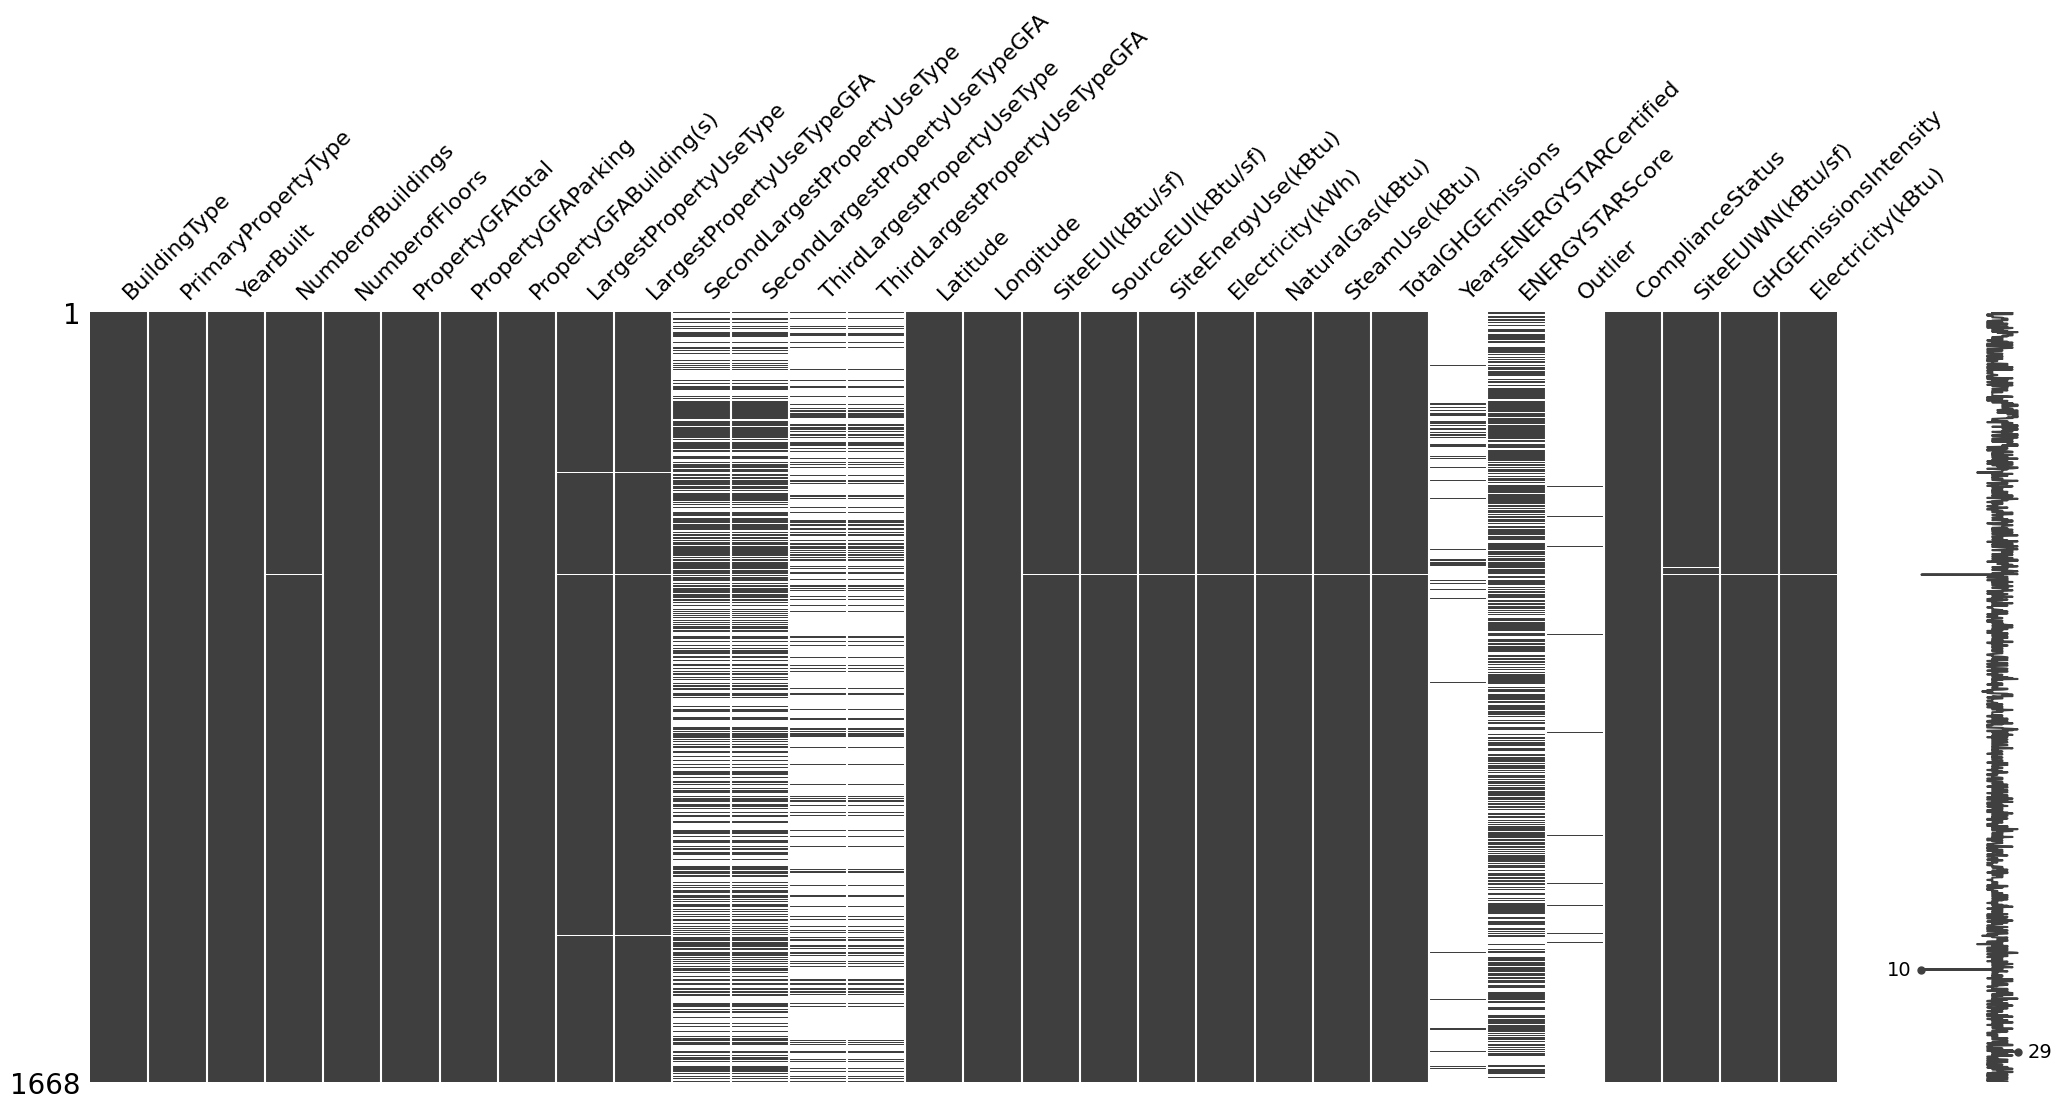

In [110]:
msno.matrix(SeattleComsuption_Forecast_NR1)

In [ ]:
# Calcul du pourcentage de valeurs manquantes pour chaque colonne de la base de données
missing_data = SeattleComsuption_Forecast_NR1.isnull().mean() * 100

# Filtrer uniquement les colonnes du dataframe qui ont des valeurs manquantes
missing_data = missing_data[missing_data > 0]

# Trier les colonnes par pourcentage de valeurs manquantes
missing_data = missing_data.sort_values(ascending=False)

# Créer un bar plot avec une taille de figure adaptée
plt.figure(figsize=(14, 10)) 

# Créer le bar plot
sns.barplot(x=missing_data.index, y=missing_data.values, palette='Blues_d')

# Ajouter des labels et un titre
plt.ylabel('Pourcentage de valeurs manquantes (%)', fontsize=12)
plt.xlabel('Colonnes', fontsize=12)
plt.title('Pourcentage de valeurs manquantes dans SeattleComsuption_Forecast_NR1', fontsize=14)

# Rotation des étiquettes de l'axe X à 45 degrés 
plt.xticks(rotation=45, ha='right', fontsize=10) 

# Ajouter des annotations au-dessus des barres pour plus de clarté
for i in range(len(missing_data)):
    plt.text(x=i, y=missing_data.values[i] + 0.5, s=f"{missing_data.values[i]:.1f}%",
             ha='center', va='bottom', fontsize=9)

# Réduire l'espace autour du graphique pour éviter les chevauchements
plt.tight_layout()

# Afficher le graphique
plt.show()

## **<div style="text-align:center"><span style="font-size:1em;"> <code>Feature engineering: identification et traitement des valeurs aberrantes</code></span> </div>**

In [112]:
SeattleComsuption_Forecast_NR1.shape

(1668, 30)

In [113]:
SeattleComsuption_Forecast_NR1.describe()

,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,Latitude,Longitude,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),Electricity(kWh),NaturalGas(kBtu),SteamUse(kBtu),TotalGHGEmissions,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUIWN(kBtu/sf),GHGEmissionsIntensity,Electricity(kBtu)
count,1668.000000,1666.000000,1668.000000,1.668000e+03,1668.000000,1.668000e+03,1.662000e+03,855.000000,353.00000,1668.000000,1668.000000,1665.000000,1666.000000,1.666000e+03,1.666000e+03,1.666000e+03,1.666000e+03,1666.000000,9.800000e+01,1094.000000,1665.000000,1666.000000,1.666000e+03
mean,1961.913669,1.168667,4.121103,1.188427e+05,12897.979017,1.059447e+05,9.876469e+04,36804.160581,14923.13994,47.616054,-122.332908,72.158799,175.829892,8.437933e+06,1.712630e+06,1.970845e+06,5.125726e+05,184.973301,2.057347e+57,65.449726,74.568529,1.607845,5.843493e+06
std,32.741755,2.931409,6.563407,2.973622e+05,42274.511185,2.842116e+05,2.767111e+05,69845.261024,36790.55656,0.048168,0.024580,74.048129,185.932121,3.024380e+07,6.095172e+06,9.370814e+06,5.513944e+06,751.976001,2.036670e+58,28.492928,75.028403,2.336882,2.079673e+07
min,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,0.000000,0.00000,47.499170,-122.411820,0.000000,0.000000,0.000000e+00,-3.382680e+04,0.000000e+00,0.000000e+00,-0.800000,2.007000e+03,1.000000,0.000000,-0.020000,-1.154170e+05
25%,1930.000000,1.000000,1.000000,2.947775e+04,0.000000,2.847525e+04,2.552750e+04,5350.000000,2663.00000,47.585458,-122.343280,33.700001,76.450001,1.229291e+06,2.114083e+05,0.000000e+00,0.000000e+00,19.967500,2.016000e+03,48.000000,35.400002,0.350000,7.213255e+05
50%,1965.000000,1.000000,2.000000,4.928950e+04,0.000000,4.739150e+04,4.377050e+04,12000.000000,5931.00000,47.612340,-122.332935,51.900002,130.949997,2.554947e+06,4.724153e+05,4.982630e+05,0.000000e+00,49.580000,2.017202e+07,73.000000,53.900002,0.880000,1.611881e+06
75%,1989.000000,1.000000,4.000000,1.053250e+05,0.000000,9.475975e+04,9.198375e+04,31881.000000,12941.00000,47.649675,-122.321675,81.699997,203.950001,6.913348e+06,1.420747e+06,1.520000e+06,0.000000e+00,142.382500,2.015950e+19,89.000000,85.199997,1.890000,4.847589e+06
max,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,686750.000000,459748.00000,47.733870,-122.258640,834.400024,2620.000000,8.739237e+08,1.925775e+08,2.979090e+08,1.349435e+08,16870.980000,2.016200e+59,100.000000,834.400024,34.090000,6.570744e+08


In [ ]:
# Script pour identifier le nombre d'outliers grâce à la méthode IQG interquatile
colonnes_numeriques = SeattleComsuption_Forecast_NR1.select_dtypes(include=['float64', 'int64']).columns

# Calcul des quantiles et de l'IQR (écart interquartile) pour les colonnes numériques
Q1 = SeattleComsuption_Forecast_NR1[colonnes_numeriques].quantile(0.25)
Q3 = SeattleComsuption_Forecast_NR1[colonnes_numeriques].quantile(0.75)
IQR = Q3 - Q1

# Détection des outliers
outliers = ((SeattleComsuption_Forecast_NR1[colonnes_numeriques] < (Q1 - 1.5 * IQR)) |
            (SeattleComsuption_Forecast_NR1[colonnes_numeriques] > (Q3 + 1.5 * IQR)))

# Afficher les résultats
print("Outliers détectés par colonne :")
print(outliers.sum())

YearBuilt : Maximum ≈ 2015 (Année)

YearBuilt Moyenne : 1961.91 (Année)
NumberofBuildings : Maximum ≈ 111 (Nombre)

NumberofBuildings Moyenne : 1.17
NumberofFloors : Maximum ≈ 99 (Nombre d'étages)

NumberofFloors Moyenne : 4.12
PropertyGFATotal : Maximum ≈ 9 320 156 (Pieds carrés)

PropertyGFATotal Moyenne : 188 427 (Pieds carrés)
PropertyGFAParking : Maximum ≈ 512 608 (Pieds carrés)

PropertyGFAParking Moyenne : 128 980 (Pieds carrés)
PropertyGFABuilding(s) : Maximum ≈ 9 320 156 (Pieds carrés)

PropertyGFABuilding(s) Moyenne : 105 947 (Pieds carrés)
LargestPropertyUseTypeGFA : Maximum ≈ 9 320 156 (Pieds carrés)

LargestPropertyUseTypeGFA Moyenne : 98 764 (Pieds carrés)
SecondLargestPropertyUseTypeGFA : Valeur manquante dans les données

SecondLargestPropertyUseTypeGFA Moyenne : Valeur manquante
ThirdLargestPropertyUseTypeGFA : Valeur manquante dans les données

ThirdLargestPropertyUseTypeGFA Moyenne : Valeur manquante
Latitude : Maximum ≈ 47.73 (Degrés de latitude)

Latitude Moyenne : 47.61
Longitude : Maximum ≈ -122.25 (Degrés de longitude)

Longitude Moyenne : -122.33
SiteEUI(kBtu/sf) : Maximum ≈ 834.40 (kBtu par pied carré)

SiteEUI Moyenne : 72.16 (kBtu par pied carré)
SourceEUI(kBtu/sf) : Maximum ≈ 2 620 (kBtu par pied carré)

SourceEUI Moyenne : 157.83 (kBtu par pied carré)
SiteEnergyUse(kBtu) : Maximum ≈ 8.79e+08 (kBtu)

SiteEnergyUse Moyenne : 84 379 300 (kBtu)
Electricity(kWh) : Maximum ≈ 1.93e+08 (kWh)

Electricity Moyenne : 17 126 000 (kWh)
NaturalGas(kBtu) : Maximum ≈ 2.98e+08 (kBtu)

NaturalGas Moyenne : 19 708 456 (kBtu)
SteamUse(kBtu) : Maximum ≈ 1.34e+08 (kBtu)

SteamUse Moyenne : 5 127 526 (kBtu)
TotalGHGEmissions : Maximum ≈ 16 870.98 (Tonnes de CO₂)

TotalGHGEmissions Moyenne : 184.97 (Tonnes de CO₂)
YearsENERGYSTARCertified : Maximum ≈ 2.02e+59 (Années)

YearsENERGYSTARCertified Moyenne : 2.05e+57 (Années)
ENERGYSTARSScore : Maximum ≈ 100 (Score)


SiteEUIWN(kBtu/sf): Intensité énergétique du site ajustée aux conditions météorologiques (en kBtu par pied carré).
Pour la consommation denergie
moyenne: 74.56
max : 834.40

GHGEmissionsIntensity: Intensité des émissions de gaz à effet de serre (en kg de CO2 par pied carré).
moyenne: 1.60
max : 34.09



ENERGYSTARSScore Moyenne : 65.49 (Score)

In [ ]:
# Créer le box plot pour la VARIABLE "NumberofBuildings" pour localiser les valeurs aberrantes
# Création du box plot (affichage sur la vertical)
plt.figure(figsize=(8, 6))
ax = sns.boxplot(y=SeattleComsuption_Forecast_NR1['NumberofBuildings'])  # Utilisation de 'y' pour un box plot vertical

# Ajouter les valeurs le long de l'axe vertical
for i, artist in enumerate(ax.artists):
    # Récupérer les coordonnées pour l'annotation
    y_position = artist.get_ydata()[0]  # Position en Y pour l'annotation
    ax.text(-0.05, y_position, f'{y_position:.2f}', va='center', ha='right', fontsize=10, color='black')

# Réglages du titre et des labels
plt.title('Box Plot pour le nombre de bâtiment')
plt.ylabel('NumberofBuildings')
plt.xlabel('')

# Affichage du graphique
plt.show()

In [116]:
# Filtrer les lignes où "NumberofBuildings" est supérieur à 20
filtered_df = SeattleComsuption_Forecast_NR1[
    (SeattleComsuption_Forecast_NR1['NumberofBuildings'] > 20)]

# On affiche respectivement le type de batiment, la surface total du batiment, le nombre de bâtiment, la localisation, la colonne outlier et compliance status
output = filtered_df[['BuildingType', 'PropertyGFATotal', 'NumberofBuildings','Latitude','Longitude','Outlier','ComplianceStatus']]

# Afficher sous forme de tableau
display(output)


,BuildingType,PropertyGFATotal,NumberofBuildings,Latitude,Longitude,Outlier,ComplianceStatus
105,Campus,441071,27.0,47.54700,-122.35307,NaN,Compliant
1862,Campus,260241,23.0,47.65561,-122.38063,NaN,Compliant
3274,Campus,9320156,111.0,47.65644,-122.31041,NaN,Compliant


#Le batiement situé **47.54700	-122.35307** correspond au descriptif suivant il comporte environs 12 batiments | Nous pouvons donc supprimer cet enregistrement
- **Jardin chinois de style Sichuan et espace événementiel situé au South Seattle College**. Magnifique feuillage et architecture ouverts au public.

#Le batiement **situé 47.65561	-122.38063** correspond au descriptif suivant en visualisant ce batiement sur google map nous constatons qu'il y a moins de 23 batiments.  | Nous pouvons donc supprimer cet enregistrement
- **FedEx Authorized ShipCenter**

#Le batiement situé 	**47.65644	-122.31041** correspond au descriptif suivant il comporte moins de 111 batiments | Nous pouvons donc supprimer cet enregistrement

- **le campus de l'Université de Washington (UW) à Seattle**, dans le secteur nord-est de la ville. Il s'agit d'un bâtiment universitaire ou d'une structure liée à l'université. il comporte plusieurs batiments mais bien moins que 111 batiments


In [117]:
# Liste des index des lignes qui contiennent des valeurs aberrantes
indices = [105, 1862, 3274]

# Supprimer directement les lignes avec les index spécifiés
SeattleComsuption_Forecast_NR1 = SeattleComsuption_Forecast_NR1[~SeattleComsuption_Forecast_NR1.index.isin(indices)]

# Réinitialiser l'index après suppression des lignes
SeattleComsuption_Forecast_NR1 = SeattleComsuption_Forecast_NR1.reset_index(drop=True)

# Afficher la taille du DataFrame après suppression
print('Taille du DataFrame après suppression:', SeattleComsuption_Forecast_NR1.shape)

# Vérifier que les lignes ont bien été supprimées
# Filtrer les lignes qui auraient des NumberofBuildings > 20 ou < 0 (comme vérification supplémentaire)
verification_df = SeattleComsuption_Forecast_NR1[(SeattleComsuption_Forecast_NR1['NumberofBuildings'] > 20)]

# Afficher la DataFrame de vérification
if verification_df.empty:
    print("Les lignes ont bien été supprimées.")
else:
    print("Les lignes n'ont pas été complètement supprimées.")
    display(verification_df)


Taille du DataFrame après suppression: (1665, 30)
Les lignes ont bien été supprimées.


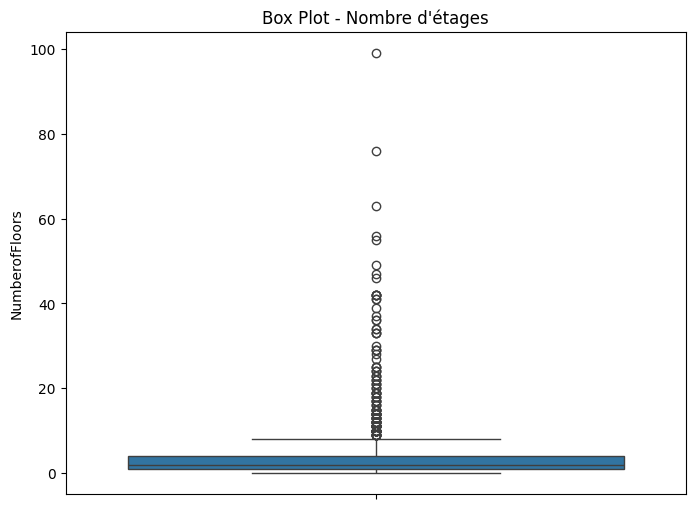

In [118]:
# Créer le box plot pour la VARIABLE "NumberofFloors" pour localiser les valeurs aberrantes
# Création du box plot (affichage sur la vertical)
plt.figure(figsize=(8, 6))
ax = sns.boxplot(y=SeattleComsuption_Forecast_NR1['NumberofFloors'])  # Utilisation de 'y' pour un box plot vertical

# Ajouter les valeurs le long de l'axe vertical
for i, artist in enumerate(ax.artists):
    # Récupérer les coordonnées pour l'annotation
    y_position = artist.get_ydata()[0]  # Position en Y pour l'annotation
    ax.text(-0.05, y_position, f'{y_position:.2f}', va='center', ha='right', fontsize=10, color='black')

# Réglages du titre et des labels
plt.title('Box Plot - Nombre d\'étages')
plt.ylabel('NumberofFloors')
plt.xlabel('')

# Affichage du graphique
plt.show()

In [119]:
# Filtrer les lignes où "NumberofFloors" est supérieur à 60 étage
filtered_df = SeattleComsuption_Forecast_NR1[
    (SeattleComsuption_Forecast_NR1['NumberofFloors'] > 60)]

# Sélectionner uniquement les colonnes 'BuildingType', 'NumberofFloors', la localisation, 'Outlier', et 'CompliaceStatus'
# On affiche respectivement le type de batiment, la surface total du batiment et le nombre d'étage + l'emplacement
output = filtered_df[['BuildingType','NumberofFloors','Latitude','Longitude','Outlier','ComplianceStatus']]

# Afficher sous forme de tableau
display(output)

,BuildingType,NumberofFloors,Latitude,Longitude,Outlier,ComplianceStatus
226,Nonresidential COS,63,47.60501,-122.32988,NaN,Compliant
548,NonResidential,76,47.60454,-122.33072,NaN,Compliant
939,NonResidential,99,47.55072,-122.30265,NaN,Compliant


Le premier batiment correspond à :
- Seattle Municipal Tower nous savons après la recherche de l'emplacement que c'est l'un des plus hauts gratte-ciel de Seattle, situé au 700 5th Avenue dans le centre-ville. Ce bâtiment est principalement utilisé pour des bureaux et abrite plusieurs agences municipales de la ville de Seattle.
/ **Nous ne supprimerons pas cet enregistrement**

- Le 2ème batiment correspond au:
Le Columbia Center a 76 étages au total. C'est un bâtiment emblématique de la ville, utilisé principalement pour des bureaux, et il offre une vue panoramique sur Seattle depuis son observatoire situé au 73e étage.
/ **Nous ne supprimerons pas cet enregistrement**

- Le 3ème batiment correspond à une église:
/ **Nous supprimons cet enregistrement**

In [120]:
# Liste des index des lignes qui contiennent des valeurs aberrantes 
indices = [939]

# Supprimer directement les lignes avec les index spécifiés
SeattleComsuption_Forecast_NR1 = SeattleComsuption_Forecast_NR1[~SeattleComsuption_Forecast_NR1.index.isin(indices)]

# Réinitialiser l'index après suppression des lignes
SeattleComsuption_Forecast_NR1 = SeattleComsuption_Forecast_NR1.reset_index(drop=True)

# Afficher la taille du DataFrame après suppression
print('Taille du DataFrame après suppression:', SeattleComsuption_Forecast_NR1.shape)

# Vérifier que les lignes ont bien été supprimées
# Filtrer les lignes qui auraient des NumberofBuildings > 20 ou < 0 (comme vérification supplémentaire)
verification_df = SeattleComsuption_Forecast_NR1[(SeattleComsuption_Forecast_NR1['NumberofFloors'] > 60)]

# Afficher la DataFrame de vérification
if verification_df.empty:
    print("Les lignes ont bien été supprimées.")
else:
    print("Les lignes n'ont pas été complètement supprimées.")
    display(verification_df)

Taille du DataFrame après suppression: (1664, 30)
Les lignes n'ont pas été complètement supprimées.


,BuildingType,PrimaryPropertyType,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,Latitude,Longitude,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),Electricity(kWh),NaturalGas(kBtu),SteamUse(kBtu),TotalGHGEmissions,YearsENERGYSTARCertified,ENERGYSTARScore,Outlier,ComplianceStatus,SiteEUIWN(kBtu/sf),GHGEmissionsIntensity,Electricity(kBtu)
226,Nonresidential COS,Large Office,1990,1.0,63,1354987,159600,1195387,Office,1191115.0,Parking,159599.0,Other,18656.0,47.60501,-122.32988,50.400002,158.100006,61576184.0,18046946.0,0.0,0.0,429.27,2.014200e+27,89.0,NaN,Compliant,50.400002,0.32,61576180.0
548,NonResidential,Large Office,1985,1.0,76,1952220,319400,1632820,Office,1680937.0,Parking,319368.0,NaN,NaN,47.60454,-122.33072,55.299999,167.300003,92937640.0,25747908.0,5085763.0,0.0,882.56,2.017200e+27,86.0,NaN,Compliant,55.099998,0.45,87851862.0


In [ ]:
# Créer le box plot pour la variable "PropertyGFATotal"
plt.figure(figsize=(8, 6))
ax = sns.boxplot(y=SeattleComsuption_Forecast_NR1['PropertyGFATotal'])  # Boxplot vertical

# Réglages du titre et des labels
plt.title('Box Plot - Superficie totale (GFA) de la propriété')
plt.ylabel('PropertyGFATotal')
plt.xlabel('')

# Affichage du graphique
plt.show()


In [122]:
# Filtrer les lignes où "PropertyGFATotal" est supérieur à 2millions de m2
filtered_df = SeattleComsuption_Forecast_NR1[(SeattleComsuption_Forecast_NR1['PropertyGFATotal'] > 2000000)]

# Sélectionner uniquement les colonnes 'BuildingType', 'PropertyGFATotal' ,'NumberofFloors', la localisation , outlier et compliancestatus
# On affiche respectivement les colonnes
output = filtered_df[['BuildingType', 'PropertyGFATotal', 'NumberofFloors','Latitude','Longitude','Outlier','ComplianceStatus']]

# Afficher sous forme de tableau
display(output)

,BuildingType,PropertyGFATotal,NumberofFloors,Latitude,Longitude,Outlier,ComplianceStatus
981,Campus,2200000,2,47.61065,-122.31711,NaN,Compliant


In [123]:
# Liste des index des lignes qui contiennent des valeurs aberrantes (deux millions de m2)
indices = [981]

# Supprimer directement les lignes avec les index spécifiés
SeattleComsuption_Forecast_NR1 = SeattleComsuption_Forecast_NR1[~SeattleComsuption_Forecast_NR1.index.isin(indices)]

# Réinitialiser l'index après suppression des lignes
SeattleComsuption_Forecast_NR1 = SeattleComsuption_Forecast_NR1.reset_index(drop=True)

# Afficher la taille du DataFrame après suppression
print('Taille du DataFrame après suppression:', SeattleComsuption_Forecast_NR1.shape)

# Vérifier que les lignes ont bien été supprimées
# Filtrer les lignes qui auraient des PropertyGFATotal > 2 millions 
verification_df = SeattleComsuption_Forecast_NR1[(SeattleComsuption_Forecast_NR1['PropertyGFATotal'] > 2000000)]

# Afficher la DataFrame de vérification
if verification_df.empty:
    print("Les lignes ont bien été supprimées.")
else:
    print("Les lignes n'ont pas été complètement supprimées.")
    display(verification_df)

Taille du DataFrame après suppression: (1663, 30)
Les lignes ont bien été supprimées.


In [ ]:
# Créer le box plot pour la VARIABLE "PropertyGFAParking" pour localiser les valeurs aberrantes
# Création du box plot (affichage sur la vertical)
plt.figure(figsize=(8, 6))
ax = sns.boxplot(y=SeattleComsuption_Forecast_NR1['PropertyGFAParking'])  # Utilisation de 'y' pour un box plot vertical

# Ajouter les valeurs le long de l'axe vertical
for i, artist in enumerate(ax.artists):
    # Récupérer les coordonnées pour l'annotation
    y_position = artist.get_ydata()[0]  # Position en Y pour l'annotation
    ax.text(-0.05, y_position, f'{y_position:.2f}', va='center', ha='right', fontsize=10, color='black')

# Réglages du titre et des labels
plt.title('Box Plot - Superficie du parking (GFA)')
plt.ylabel('PropertyGFAParking')
plt.xlabel('')

# Affichage du graphique
plt.show()

In [125]:
# Filtrer les lignes où "PropertyGFAParking" est supérieur à 400000m2 
filtered_df = SeattleComsuption_Forecast_NR1[
    (SeattleComsuption_Forecast_NR1['PropertyGFAParking'] > 400000)]

# Sélectionner uniquement les colonnes 'BuildingType', 'PropertyGFAParking' , 'NumberofFloors', la localisation, Outlier et compliancestatus
# On affiche respectivement les colonnes
output = filtered_df[['BuildingType', 'PropertyGFAParking', 'NumberofFloors','Latitude','Longitude', 'Outlier','ComplianceStatus']]

# Afficher sous forme de tableau
display(output)

,BuildingType,PropertyGFAParking,NumberofFloors,Latitude,Longitude,Outlier,ComplianceStatus
266,NonResidential,512608,46,47.61054,-122.33466,NaN,Compliant
300,NonResidential,407795,14,47.60921,-122.32425,NaN,Compliant


In [126]:
# Liste des index des lignes qui contiennent des valeurs aberrantes en moyenne dans notre jeu de données la superficie des parkings est de 12897m2
indices = [266,300]

# Supprimer directement les lignes avec les index spécifiés
SeattleComsuption_Forecast_NR1 = SeattleComsuption_Forecast_NR1[~SeattleComsuption_Forecast_NR1.index.isin(indices)]

# Réinitialiser l'index après suppression des lignes
SeattleComsuption_Forecast_NR1 = SeattleComsuption_Forecast_NR1.reset_index(drop=True)

# Afficher la taille du DataFrame après suppression
print('Taille du DataFrame après suppression:', SeattleComsuption_Forecast_NR1.shape)

# Vérifier que les lignes ont bien été supprimées
# Filtrer les lignes 
verification_df = SeattleComsuption_Forecast_NR1[(SeattleComsuption_Forecast_NR1['PropertyGFAParking'] > 400000)]

# Afficher la DataFrame de vérification
if verification_df.empty:
    print("Les lignes ont bien été supprimées.")
else:
    print("Les lignes n'ont pas été complètement supprimées.")
    display(verification_df)

Taille du DataFrame après suppression: (1661, 30)
Les lignes ont bien été supprimées.


In [ ]:
# Créer le box plot pour la VARIABLE "PropertyGFABuilding" pour localiser les valeurs aberrantes
# Création du box plot (affichage sur la vertical)
plt.figure(figsize=(8, 6))
ax = sns.boxplot(y=SeattleComsuption_Forecast_NR1['PropertyGFABuilding(s)'])  # Utilisation de 'y' pour un box plot vertical

# Ajouter les valeurs le long de l'axe vertical
for i, artist in enumerate(ax.artists):
    # Récupérer les coordonnées pour l'annotation
    y_position = artist.get_ydata()[0]  # Position en Y pour l'annotation
    ax.text(-0.05, y_position, f'{y_position:.2f}', va='center', ha='right', fontsize=10, color='black')

# Réglages du titre et des labels
plt.title('Box Plot - Superficie des bâtiments (GFA)')
plt.ylabel('PropertyGFABuilding(s)')
plt.xlabel('')

# Affichage du graphique
plt.show()

In [128]:
# Filtrer les lignes où "PropertyGFABuilding(s)" est supérieur à 1 million de m2 
filtered_df = SeattleComsuption_Forecast_NR1[
    (SeattleComsuption_Forecast_NR1['PropertyGFABuilding(s)'] > 1000000)]

# Sélectionner uniquement les colonnes 'BuildingType', 'PropertyGFABuilding' 'NumberofFloors',  la localisation, Outlier et compliancestatus
# On affiche respectivement les colonnes
output = filtered_df[['BuildingType', 'PropertyGFABuilding(s)', 'NumberofFloors','Latitude','Longitude', 'Outlier','ComplianceStatus']]

# Afficher sous forme de tableau
display(output)

,BuildingType,PropertyGFABuilding(s),NumberofFloors,Latitude,Longitude,Outlier,ComplianceStatus
153,NonResidential,1258280,6,47.595440,-122.331590,NaN,Compliant
156,NonResidential,1172127,3,47.590850,-122.333540,NaN,Compliant
167,NonResidential,1158691,8,47.603990,-122.323770,NaN,Compliant
214,NonResidential,1323055,47,47.605050,-122.334270,NaN,Compliant
226,Nonresidential COS,1195387,63,47.605010,-122.329880,NaN,Compliant
264,NonResidential,1115000,55,47.607230,-122.336110,NaN,Compliant
284,NonResidential,1215718,56,47.610430,-122.332060,NaN,Compliant
296,NonResidential,1400000,6,47.611950,-122.331670,NaN,Non-Compliant
468,NonResidential,1380959,6,47.581810,-122.335340,NaN,Compliant
480,NonResidential,1592914,42,47.607400,-122.337770,NaN,Compliant


In [129]:
# Liste des index des lignes qui contiennent des valeurs aberrantes concernant la superficie des bâtiments
indices = [153,156, 167, 214, 226, 264, 284, 296, 468, 480, 546, 564, 605, 1381]

# Supprimer directement les lignes avec les index spécifiés
SeattleComsuption_Forecast_NR1 = SeattleComsuption_Forecast_NR1[~SeattleComsuption_Forecast_NR1.index.isin(indices)]

# Réinitialiser l'index après suppression des lignes
SeattleComsuption_Forecast_NR1 = SeattleComsuption_Forecast_NR1.reset_index(drop=True)

# Afficher la taille du DataFrame après suppression
print('Taille du DataFrame après suppression:', SeattleComsuption_Forecast_NR1.shape)

# Vérifier que les lignes ont bien été supprimées
# Filtrer les lignes qui auraient des PropertyGFABuilding > 1 million de m2 
verification_df = SeattleComsuption_Forecast_NR1[(SeattleComsuption_Forecast_NR1['PropertyGFABuilding(s)'] > 1000000)]

# Afficher la DataFrame de vérification
if verification_df.empty:
    print("Les lignes ont bien été supprimées.")
else:
    print("Les lignes n'ont pas été complètement supprimées.")
    display(verification_df)

Taille du DataFrame après suppression: (1647, 30)
Les lignes ont bien été supprimées.


In [ ]:
# Créer le box plot pour la VARIABLE "LargestPropertyUseTypeGFA" pour localiser les valeurs aberrantes
# Création du box plot (affichage sur la vertical)
plt.figure(figsize=(8, 6))
ax = sns.boxplot(y=SeattleComsuption_Forecast_NR1['LargestPropertyUseTypeGFA'])  # Utilisation de 'y' pour un box plot vertical

# Ajouter les valeurs le long de l'axe vertical
for i, artist in enumerate(ax.artists):
    # Récupérer les coordonnées pour l'annotation
    y_position = artist.get_ydata()[0]  # Position en Y pour l'annotation
    ax.text(-0.05, y_position, f'{y_position:.2f}', va='center', ha='right', fontsize=10, color='black')

# Réglages du titre et des labels
plt.title('Box Plot - Superficie brute de plancher (GFA)')
plt.ylabel('LargestPropertyUseTypeGFA')
plt.xlabel('')

# Affichage du graphique
plt.show()

In [131]:
# Filtrer les lignes où "LargestPropertyUseTypeGFA" est supérieur à 100 000 m2 alors que la moyenne de la superficie brut plancher est de 84 681 m2
filtered_df = SeattleComsuption_Forecast_NR1[(SeattleComsuption_Forecast_NR1['LargestPropertyUseTypeGFA'] > 1000000)]

# Sélectionner uniquement les colonnes 'BuildingType', 'PropertyGFATotal' et 'NumberofBuildings'
# On affiche respectivement le type de batiment, la surface total du batiment et le nombre d'étage + l'emplacement
output = filtered_df[['BuildingType', 'LargestPropertyUseTypeGFA', 'NumberofFloors','Latitude','Longitude', 'Outlier','ComplianceStatus']]

# Afficher sous forme de tableau
display(output)

,BuildingType,LargestPropertyUseTypeGFA,NumberofFloors,Latitude,Longitude,Outlier,ComplianceStatus
1602,NonResidential,1010135.0,8,47.60986,-122.32774,NaN,Compliant


In [132]:
# Liste des index des lignes qui contiennent des valeurs aberrantes 
indices = [1602]

# Supprimer directement les lignes avec les index spécifiés
SeattleComsuption_Forecast_NR1 = SeattleComsuption_Forecast_NR1[~SeattleComsuption_Forecast_NR1.index.isin(indices)]

# Réinitialiser l'index après suppression des lignes
SeattleComsuption_Forecast_NR1 = SeattleComsuption_Forecast_NR1.reset_index(drop=True)

# Afficher la taille du DataFrame après suppression
print('Taille du DataFrame après suppression:', SeattleComsuption_Forecast_NR1.shape)

# Vérifier que les lignes ont bien été supprimées
# Filtrer les lignes qui auraient des PropertyGFATotal > 2 millions ou < 0 (comme vérification supplémentaire)
verification_df = SeattleComsuption_Forecast_NR1[(SeattleComsuption_Forecast_NR1['LargestPropertyUseTypeGFA'] > 1000000)]

# Afficher la DataFrame de vérification
if verification_df.empty:
    print("Les lignes ont bien été supprimées.")
else:
    print("Les lignes n'ont pas été complètement supprimées.")
    display(verification_df)

Taille du DataFrame après suppression: (1646, 30)
Les lignes ont bien été supprimées.


In [ ]:
# Créer le box plot pour la VARIABLE "SecondLargestPropertyUseTypeGFA" pour localiser les valeurs aberrantes
# Création du box plot (affichage sur la vertical)
plt.figure(figsize=(8, 6))
ax = sns.boxplot(y=SeattleComsuption_Forecast_NR1['SecondLargestPropertyUseTypeGFA'])  # Utilisation de 'y' pour un box plot vertical

# Ajouter les valeurs le long de l'axe vertical
for i, artist in enumerate(ax.artists):
    # Récupérer les coordonnées pour l'annotation
    y_position = artist.get_ydata()[0]  # Position en Y pour l'annotation
    ax.text(-0.05, y_position, f'{y_position:.2f}', va='center', ha='right', fontsize=10, color='black')

# Réglages du titre et des labels
plt.title('Box Plot - Superficie du deuxième plus grand usage de la propriété')
plt.ylabel('SecondLargestPropertyUseTypeGFA')
plt.xlabel('')

# Affichage du graphique
plt.show()

In [134]:
# Filtrer les lignes où "SecondLargestPropertyUseTypeGFA" est supérieur à 400 000 m2 alors que la moyenne de la superficie est de  30 0000 m2
filtered_df = SeattleComsuption_Forecast_NR1[(SeattleComsuption_Forecast_NR1['SecondLargestPropertyUseTypeGFA'] > 400000)]

# Sélectionner uniquement les colonnes 'BuildingType', 'PropertyGFATotal' et 'NumberofBuildings'
# On affiche respectivement le type de batiment, la surface total du batiment et le nombre d'étage + l'emplacement
output = filtered_df[['BuildingType', 'SecondLargestPropertyUseTypeGFA', 'NumberofFloors','Latitude','Longitude', 'Outlier','ComplianceStatus']]

# Afficher sous forme de tableau
display(output)

,BuildingType,SecondLargestPropertyUseTypeGFA,NumberofFloors,Latitude,Longitude,Outlier,ComplianceStatus
34,Campus,639931.0,3,47.53493,-122.31788,NaN,Compliant
161,NonResidential,438756.0,0,47.61275,-122.33330,NaN,Compliant


In [135]:
# Liste des index des lignes qui contiennent des valeurs aberrantes 
indices = [34,161]

# Supprimer directement les lignes avec les index spécifiés
SeattleComsuption_Forecast_NR1 = SeattleComsuption_Forecast_NR1[~SeattleComsuption_Forecast_NR1.index.isin(indices)]

# Réinitialiser l'index après suppression des lignes
SeattleComsuption_Forecast_NR1 = SeattleComsuption_Forecast_NR1.reset_index(drop=True)

# Afficher la taille du DataFrame après suppression
print('Taille du DataFrame après suppression:', SeattleComsuption_Forecast_NR1.shape)

# Vérifier que les lignes ont bien été supprimées
# Filtrer les lignes qui auraient des PropertyGFATotal > 2 millions ou < 0 (comme vérification supplémentaire)
verification_df = SeattleComsuption_Forecast_NR1[(SeattleComsuption_Forecast_NR1['SecondLargestPropertyUseTypeGFA'] > 400000)]

# Afficher la DataFrame de vérification
if verification_df.empty:
    print("Les lignes ont bien été supprimées.")
else:
    print("Les lignes n'ont pas été complètement supprimées.")
    display(verification_df)

Taille du DataFrame après suppression: (1644, 30)
Les lignes ont bien été supprimées.


In [ ]:
# Créer le box plot pour la VARIABLE "ThirdLargestPropertyUseTypeGFA" pour localiser les valeurs aberrantes
# Création du box plot (affichage sur la vertical)
plt.figure(figsize=(8, 6))
ax = sns.boxplot(y=SeattleComsuption_Forecast_NR1['ThirdLargestPropertyUseTypeGFA'])  # Utilisation de 'y' pour un box plot vertical

# Ajouter les valeurs le long de l'axe vertical
for i, artist in enumerate(ax.artists):
    # Récupérer les coordonnées pour l'annotation
    y_position = artist.get_ydata()[0]  # Position en Y pour l'annotation
    ax.text(-0.05, y_position, f'{y_position:.2f}', va='center', ha='right', fontsize=10, color='black')

# Réglages du titre et des labels
plt.title('Box Plot - Superficie du troisième plus grand usage de la propriété')
plt.ylabel('ThirdLargestPropertyUseTypeGFA')
plt.xlabel('')

# Affichage du graphique
plt.show()

In [137]:
# Filtrer les lignes où "ThirdLargestPropertyUseTypeGFA" 
filtered_df = SeattleComsuption_Forecast_NR1[(SeattleComsuption_Forecast_NR1['ThirdLargestPropertyUseTypeGFA'] > 140000)]

# Sélectionner uniquement les colonnes 'BuildingType', 'ThirdLargestPropertyUseTypeGFA' et 'NumberofFloors' + localisation, outlier et compliancestatus
# On affiche respectivement les colonnes
output = filtered_df[['BuildingType', 'ThirdLargestPropertyUseTypeGFA', 'NumberofFloors','Latitude','Longitude', 'Outlier','ComplianceStatus']]

# Afficher sous forme de tableau
display(output)

,BuildingType,ThirdLargestPropertyUseTypeGFA,NumberofFloors,Latitude,Longitude,Outlier,ComplianceStatus
1296,NonResidential,141450.0,39,47.61376,-122.33445,NaN,Compliant


In [138]:
# Liste des index des lignes qui contiennent des valeurs aberrantes 
indices = [1296]

# Supprimer directement les lignes avec les index spécifiés
SeattleComsuption_Forecast_NR1 = SeattleComsuption_Forecast_NR1[~SeattleComsuption_Forecast_NR1.index.isin(indices)]

# Réinitialiser l'index après suppression des lignes
SeattleComsuption_Forecast_NR1 = SeattleComsuption_Forecast_NR1.reset_index(drop=True)

# Afficher la taille du DataFrame après suppression
print('Taille du DataFrame après suppression:', SeattleComsuption_Forecast_NR1.shape)

# Vérifier que les lignes ont bien été supprimées
# Filtrer les lignes
verification_df = SeattleComsuption_Forecast_NR1[(SeattleComsuption_Forecast_NR1['ThirdLargestPropertyUseTypeGFA'] > 140000)]

# Afficher la DataFrame de vérification
if verification_df.empty:
    print("Les lignes ont bien été supprimées.")
else:
    print("Les lignes n'ont pas été complètement supprimées.")
    display(verification_df)

Taille du DataFrame après suppression: (1643, 30)
Les lignes ont bien été supprimées.


In [ ]:
# Créer le box plot pour la VARIABLE "Longitude" pour localiser les valeurs aberrantes
# Création du box plot (affichage sur la vertical)
plt.figure(figsize=(8, 6))
ax = sns.boxplot(y=SeattleComsuption_Forecast_NR1['Longitude'])  # Utilisation de 'y' pour un box plot vertical

# Ajouter les valeurs le long de l'axe vertical
for i, artist in enumerate(ax.artists):
    # Récupérer les coordonnées pour l'annotation
    y_position = artist.get_ydata()[0]  # Position en Y pour l'annotation
    ax.text(-0.05, y_position, f'{y_position:.2f}', va='center', ha='right', fontsize=10, color='black')

# Réglages du titre et des labels
plt.title('Box Plot - Longitude')
plt.ylabel('Longitude')
plt.xlabel('')

# Affichage du graphique
plt.show()

In [140]:
# Filtrer les lignes où "Longitude" 
filtered_df = SeattleComsuption_Forecast_NR1[(SeattleComsuption_Forecast_NR1['Longitude'] < - 122.40)]

# Sélectionner uniquement les colonnes 
# On affiche respectivement les colonnes
output = filtered_df[['BuildingType', 'ThirdLargestPropertyUseTypeGFA', 'NumberofFloors','Latitude','Longitude', 'Outlier','ComplianceStatus']]

# Afficher sous forme de tableau
display(output)


,BuildingType,ThirdLargestPropertyUseTypeGFA,NumberofFloors,Latitude,Longitude,Outlier,ComplianceStatus
624,SPS-District K-12,NaN,2,47.57730,-122.40740,NaN,Error - Correct Default Data
633,NonResidential,NaN,2,47.67528,-122.40836,NaN,Compliant
634,NonResidential,1000.0,3,47.67440,-122.40735,NaN,Compliant
635,NonResidential,NaN,3,47.67398,-122.40765,NaN,Compliant
647,NonResidential,NaN,2,47.57384,-122.41182,NaN,Compliant
764,NonResidential,NaN,2,47.63927,-122.40320,NaN,Compliant


In [141]:
# Liste des index des lignes qui contiennent des valeurs aberrantes 
indices = [624, 633, 634, 635, 647, 764]

# Supprimer directement les lignes avec les index spécifiés
SeattleComsuption_Forecast_NR1 = SeattleComsuption_Forecast_NR1[~SeattleComsuption_Forecast_NR1.index.isin(indices)]

# Réinitialiser l'index après suppression des lignes
SeattleComsuption_Forecast_NR1 = SeattleComsuption_Forecast_NR1.reset_index(drop=True)

# Afficher la taille du DataFrame après suppression
print('Taille du DataFrame après suppression:', SeattleComsuption_Forecast_NR1.shape)

# Vérifier que les lignes ont bien été supprimées
# Filtrer les lignes qui auraient des PropertyGFATotal > 2 millions ou < 0 (comme vérification supplémentaire)
verification_df = SeattleComsuption_Forecast_NR1[(SeattleComsuption_Forecast_NR1['Longitude'] < - 122.40)]

# Afficher la DataFrame de vérification
if verification_df.empty:
    print("Les lignes ont bien été supprimées.")
else:
    print("Les lignes n'ont pas été complètement supprimées.")
    display(verification_df)

Taille du DataFrame après suppression: (1637, 30)
Les lignes ont bien été supprimées.


In [ ]:
# Créer le box plot pour la VARIABLE "SiteEUI(kBtu/sf)" Kilo British Thermal Unit pour localiser les valeurs aberrantes
# Création du box plot (affichage sur la vertical)
plt.figure(figsize=(8, 6))
ax = sns.boxplot(y=SeattleComsuption_Forecast_NR1['SiteEUI(kBtu/sf)'])  # Utilisation de 'y' pour un box plot vertical

# Ajouter les valeurs le long de l'axe vertical
for i, artist in enumerate(ax.artists):
    # Récupérer les coordonnées pour l'annotation
    y_position = artist.get_ydata()[0]  # Position en Y pour l'annotation
    ax.text(-0.05, y_position, f'{y_position:.2f}', va='center', ha='right', fontsize=10, color='black')

# Réglages du titre et des labels
plt.title('Box Plot - Site EUI (kBtu/sf)')
plt.ylabel('SiteEUI(kBtu/sf)')
plt.xlabel('')

# Affichage du graphique
plt.show()

In [143]:
# Filtrer les lignes où "SiteEUI(kBtu/sf)" 
filtered_df = SeattleComsuption_Forecast_NR1[(SeattleComsuption_Forecast_NR1['SiteEUI(kBtu/sf)'] > 500)]

# Sélectionner uniquement les colonnes ci dessous
output = filtered_df[['BuildingType', 'SiteEUI(kBtu/sf)','Outlier','ComplianceStatus']]

# Afficher sous forme de tableau
display(output)

,BuildingType,SiteEUI(kBtu/sf),Outlier,ComplianceStatus
226,NonResidential,834.400024,NaN,Compliant
290,NonResidential,707.299988,NaN,Compliant
533,NonResidential,639.700012,NaN,Compliant
668,NonResidential,696.700012,NaN,Compliant
1562,NonResidential,593.599976,NaN,Compliant
1574,NonResidential,694.700012,NaN,Compliant


In [144]:
# Liste des index des lignes qui contiennent des valeurs aberrantes 
indices = [226, 290, 533, 668, 1562, 1574]

# Supprimer directement les lignes avec les index spécifiés
SeattleComsuption_Forecast_NR1 = SeattleComsuption_Forecast_NR1[~SeattleComsuption_Forecast_NR1.index.isin(indices)]

# Réinitialiser l'index après suppression des lignes
SeattleComsuption_Forecast_NR1 = SeattleComsuption_Forecast_NR1.reset_index(drop=True)

# Afficher la taille du DataFrame après suppression
print('Taille du DataFrame après suppression:', SeattleComsuption_Forecast_NR1.shape)

# Vérifier que les lignes ont bien été supprimées
verification_df = SeattleComsuption_Forecast_NR1[(SeattleComsuption_Forecast_NR1['SiteEUI(kBtu/sf)'] > 500)]

# Afficher la DataFrame de vérification
if verification_df.empty:
    print("Les lignes ont bien été supprimées.")
else:
    print("Les lignes n'ont pas été complètement supprimées.")
    display(verification_df)


Taille du DataFrame après suppression: (1631, 30)
Les lignes ont bien été supprimées.


In [ ]:
# Créer le box plot pour la VARIABLE "SourceEUI(kBtu/sf)" pour localiser les valeurs aberrantes
# Création du box plot (affichage sur la vertical)
plt.figure(figsize=(8, 6))
ax = sns.boxplot(y=SeattleComsuption_Forecast_NR1['SourceEUI(kBtu/sf)'])  # Utilisation de 'y' pour un box plot vertical

# Ajouter les valeurs le long de l'axe vertical
for i, artist in enumerate(ax.artists):
    # Récupérer les coordonnées pour l'annotation
    y_position = artist.get_ydata()[0]  # Position en Y pour l'annotation
    ax.text(-0.05, y_position, f'{y_position:.2f}', va='center', ha='right', fontsize=10, color='black')

# Réglages du titre et des labels
plt.title('Box Plot - Source EUI (kBtu/sf)')
plt.ylabel('SourceEUI(kBtu/sf)')
plt.xlabel('')

# Affichage du graphique
plt.show()

In [146]:
# Filtrer les lignes où "SourceEUI(kBtu/sf)" 
filtered_df = SeattleComsuption_Forecast_NR1[(SeattleComsuption_Forecast_NR1['SourceEUI(kBtu/sf)'] > 900)]

# Sélectionner uniquement les colonnes ci dessous
output = filtered_df[['BuildingType', 'SourceEUI(kBtu/sf)','Outlier','ComplianceStatus']]

# Afficher sous forme de tableau
display(output)

,BuildingType,SourceEUI(kBtu/sf),Outlier,ComplianceStatus
178,NonResidential,962.099976,NaN,Compliant
213,NonResidential,909.599976,High outlier,Non-Compliant
308,NonResidential,1026.599976,NaN,Compliant
453,NonResidential,1150.300049,NaN,Compliant
490,NonResidential,978.900024,High outlier,Non-Compliant
1197,NonResidential,912.799988,NaN,Compliant


In [147]:
# Liste des index des lignes qui contiennent des valeurs aberrantes 
indices = [178, 213, 308, 453, 490, 1197]

# Supprimer directement les lignes avec les index spécifiés
SeattleComsuption_Forecast_NR1 = SeattleComsuption_Forecast_NR1[~SeattleComsuption_Forecast_NR1.index.isin(indices)]

# Réinitialiser l'index après suppression des lignes
SeattleComsuption_Forecast_NR1 = SeattleComsuption_Forecast_NR1.reset_index(drop=True)

# Afficher la taille du DataFrame après suppression
print('Taille du DataFrame après suppression:', SeattleComsuption_Forecast_NR1.shape)

# Vérifier que les lignes ont bien été supprimées
verification_df = SeattleComsuption_Forecast_NR1[(SeattleComsuption_Forecast_NR1['SourceEUI(kBtu/sf)'] > 900)]

# Afficher la DataFrame de vérification
if verification_df.empty:
    print("Les lignes ont bien été supprimées.")
else:
    print("Les lignes n'ont pas été complètement supprimées.")
    display(verification_df)



Taille du DataFrame après suppression: (1625, 30)
Les lignes ont bien été supprimées.


In [ ]:
# Créer le box plot pour la VARIABLE "SiteEnergyUse(kBtu)" pour localiser les valeurs aberrantes
# Création du box plot (affichage sur la vertical)
plt.figure(figsize=(8, 6))
ax = sns.boxplot(y=SeattleComsuption_Forecast_NR1['SiteEnergyUse(kBtu)'])  # Utilisation de 'y' pour un box plot vertical

# Ajouter les valeurs le long de l'axe vertical
for i, artist in enumerate(ax.artists):
    # Récupérer les coordonnées pour l'annotation
    y_position = artist.get_ydata()[0]  # Position en Y pour l'annotation
    ax.text(-0.05, y_position, f'{y_position:.2f}', va='center', ha='right', fontsize=10, color='black')

# Réglages du titre et des labels
plt.title('Box Plot - Utilisation de l\'énergie sur le site (kBtu)')
plt.ylabel('SiteEnergyUse(kBtu)')
plt.xlabel('')

# Affichage du graphique
plt.show()

In [149]:
# Filtrer les lignes où "SiteEUI(kBtu/sf)" 
filtered_df = SeattleComsuption_Forecast_NR1[(SeattleComsuption_Forecast_NR1['SiteEnergyUse(kBtu)'] > 200000000)]

# Sélectionner uniquement les colonnes ci dessous
output = filtered_df[['BuildingType', 'SiteEnergyUse(kBtu)','Outlier','ComplianceStatus']]

# Afficher sous forme de tableau
display(output)

,BuildingType,SiteEnergyUse(kBtu),Outlier,ComplianceStatus
121,NonResidential,253832464.0,NaN,Compliant


In [150]:
# Liste des index des lignes qui contiennent des valeurs aberrantes 
indices = [121]

# Supprimer directement les lignes avec les index spécifiés
SeattleComsuption_Forecast_NR1 = SeattleComsuption_Forecast_NR1[~SeattleComsuption_Forecast_NR1.index.isin(indices)]

# Réinitialiser l'index après suppression des lignes
SeattleComsuption_Forecast_NR1 = SeattleComsuption_Forecast_NR1.reset_index(drop=True)

# Afficher la taille du DataFrame après suppression
print('Taille du DataFrame après suppression:', SeattleComsuption_Forecast_NR1.shape)

# Vérifier que les lignes ont bien été supprimées
verification_df = SeattleComsuption_Forecast_NR1[(SeattleComsuption_Forecast_NR1['SiteEnergyUse(kBtu)'] > 200000000)]

# Afficher le DataFrame de vérification
if verification_df.empty:
    print("Les lignes ont bien été supprimées.")
else:
    print("Les lignes n'ont pas été complètement supprimées.")
    display(verification_df)


Taille du DataFrame après suppression: (1624, 30)
Les lignes ont bien été supprimées.


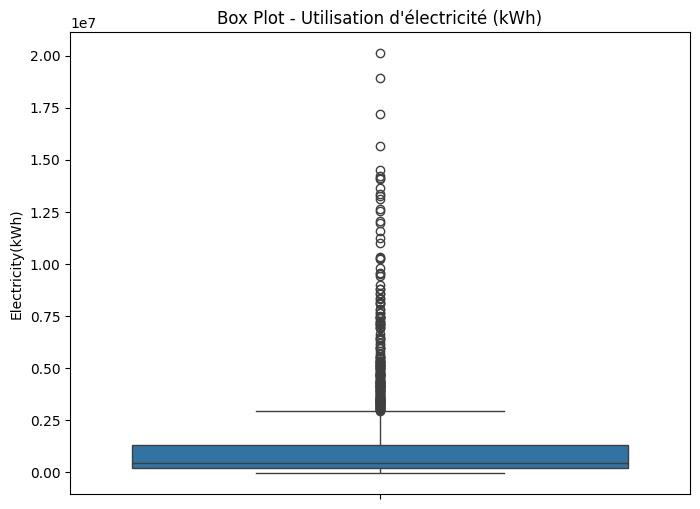

In [151]:
# Créer le box plot pour la VARIABLE "Electricity(kWh)" pour localiser les valeurs aberrantes
# Création du box plot (affichage sur la vertical)
plt.figure(figsize=(8, 6))
ax = sns.boxplot(y=SeattleComsuption_Forecast_NR1['Electricity(kWh)'])  # Utilisation de 'y' pour un box plot vertical

# Ajouter les valeurs le long de l'axe vertical
for i, artist in enumerate(ax.artists):
    # Récupérer les coordonnées pour l'annotation
    y_position = artist.get_ydata()[0]  # Position en Y pour l'annotation
    ax.text(-0.05, y_position, f'{y_position:.2f}', va='center', ha='right', fontsize=10, color='black')

# Réglages du titre et des labels
plt.title('Box Plot - Utilisation d\'électricité (kWh)')
plt.ylabel('Electricity(kWh)')
plt.xlabel('')

# Affichage du graphique
plt.show()

In [152]:
# Filtrer les lignes où "Electricity(kWh)" > 10 000 000 et "Outlier" n'est pas NaN
filtered_df = SeattleComsuption_Forecast_NR1[
    (SeattleComsuption_Forecast_NR1['SiteEnergyUse(kBtu)'] > 10000000) & 
    (SeattleComsuption_Forecast_NR1['Outlier'].notna())
]

# Sélectionner uniquement les colonnes pertinentes pour l'affichage
output = filtered_df[['BuildingType', 'Electricity(kWh)', 'Outlier', 'ComplianceStatus']]

# Afficher sous forme de tableau
print(output)


       BuildingType  Electricity(kWh)      Outlier ComplianceStatus
423  NonResidential          471503.0  Low outlier    Non-Compliant


In [154]:
# Liste des index des lignes qui contiennent des valeurs aberrantes 
indices = [423]

# Supprimer directement les lignes avec les index spécifiés
SeattleComsuption_Forecast_NR1 = SeattleComsuption_Forecast_NR1[~SeattleComsuption_Forecast_NR1.index.isin(indices)]

# Réinitialiser l'index après suppression des lignes
SeattleComsuption_Forecast_NR1 = SeattleComsuption_Forecast_NR1.reset_index(drop=True)

# Afficher la taille du DataFrame après suppression
print('Taille du DataFrame après suppression:', SeattleComsuption_Forecast_NR1.shape)



Taille du DataFrame après suppression: (1622, 30)


In [ ]:
# Créer le box plot pour la VARIABLE "NaturalGas(kBtu)" pour localiser les valeurs aberrantes
# Création du box plot (affichage sur la vertical)
plt.figure(figsize=(8, 6))
ax = sns.boxplot(y=SeattleComsuption_Forecast_NR1['NaturalGas(kBtu)'])  # Utilisation de 'y' pour un box plot vertical

# Ajouter les valeurs le long de l'axe vertical
for i, artist in enumerate(ax.artists):
    # Récupérer les coordonnées pour l'annotation
    y_position = artist.get_ydata()[0]  # Position en Y pour l'annotation
    ax.text(-0.05, y_position, f'{y_position:.2f}', va='center', ha='right', fontsize=10, color='black')

# Réglages du titre et des labels
plt.title('Box Plot - Utilisation de gaz naturel (kBtu)')
plt.ylabel('NaturalGas(kBtu)')
plt.xlabel('')

# Affichage du graphique
plt.show()

In [156]:
# Filtrer les lignes où "NaturalGas(kBtu)" 
filtered_df = SeattleComsuption_Forecast_NR1[
    (SeattleComsuption_Forecast_NR1['NaturalGas(kBtu)'] > 4000000)]

# Sélectionner uniquement les colonnes ci dessous
output = filtered_df[['BuildingType', 'NaturalGas(kBtu)','Outlier','ComplianceStatus']]

# Afficher sous forme de tableau
display(output)

,BuildingType,NaturalGas(kBtu),Outlier,ComplianceStatus
1,NonResidential,5.145082e+06,NaN,Compliant
4,NonResidential,8.803998e+06,NaN,Compliant
5,Nonresidential COS,4.715182e+06,NaN,Compliant
8,NonResidential,6.425900e+06,NaN,Compliant
9,NonResidential,4.591850e+06,NaN,Compliant
12,NonResidential,4.083440e+06,NaN,Compliant
16,NonResidential,1.233148e+07,NaN,Compliant
19,NonResidential,2.062663e+07,NaN,Compliant
20,NonResidential,2.960215e+07,NaN,Compliant
23,NonResidential,6.696211e+06,NaN,Compliant


In [157]:
# Liste des index des lignes qui contiennent des valeurs aberrantes 
indices = [29,36,84,105,125,128,155,]

# Supprimer directement les lignes avec les index spécifiés
SeattleComsuption_Forecast_NR1 = SeattleComsuption_Forecast_NR1[~SeattleComsuption_Forecast_NR1.index.isin(indices)]

# Réinitialiser l'index après suppression des lignes
SeattleComsuption_Forecast_NR1 = SeattleComsuption_Forecast_NR1.reset_index(drop=True)

# Afficher la taille du DataFrame après suppression
print('Taille du DataFrame après suppression:', SeattleComsuption_Forecast_NR1.shape)



Taille du DataFrame après suppression: (1615, 30)


In [ ]:
# Créer le box plot pour la VARIABLE "SteamUse(kBtu)" pour localiser les valeurs aberrantes
# Création du box plot (affichage sur la vertical)
plt.figure(figsize=(8, 6))
ax = sns.boxplot(y=SeattleComsuption_Forecast_NR1['SteamUse(kBtu)'])  # Utilisation de 'y' pour un box plot vertical

# Ajouter les valeurs le long de l'axe vertical
for i, artist in enumerate(ax.artists):
    # Récupérer les coordonnées pour l'annotation
    y_position = artist.get_ydata()[0]  # Position en Y pour l'annotation
    ax.text(-0.05, y_position, f'{y_position:.2f}', va='center', ha='right', fontsize=10, color='black')

# Réglages du titre et des labels
plt.title('Box Plot - Utilisation de vapeur (kBtu)')
plt.ylabel('SteamUse(kBtu)')
plt.xlabel('')

# Affichage du graphique
plt.show()

In [159]:
# Filtrer les lignes où "SteamUse(kBtu)" 
filtered_df = SeattleComsuption_Forecast_NR1[(SeattleComsuption_Forecast_NR1['SteamUse(kBtu)'] > 2000000)]

# Sélectionner uniquement les colonnes ci dessous
output = filtered_df[['BuildingType', 'SteamUse(kBtu)','Outlier','ComplianceStatus']]

# Afficher sous forme de tableau
display(output)

,BuildingType,SteamUse(kBtu),Outlier,ComplianceStatus
0,NonResidential,2003882.00,NaN,Compliant
2,NonResidential,21566554.00,NaN,Compliant
3,NonResidential,2214446.25,NaN,Compliant
7,NonResidential,2276286.50,NaN,Compliant
9,NonResidential,5237165.50,NaN,Compliant
10,NonResidential,5999360.50,NaN,Compliant
12,NonResidential,4337738.50,NaN,Compliant
13,NonResidential,4870847.50,NaN,Compliant
15,NonResidential,4592347.50,NaN,Compliant
18,NonResidential,3430862.00,NaN,Compliant


In [160]:
# Liste des index des lignes qui contiennent des valeurs aberrantes 
indices = [2, 45, 199, 235, 237, 246, 253, 341, 1032, 1535, 1547, 1571]

# Supprimer directement les lignes avec les index spécifiés
SeattleComsuption_Forecast_NR1 = SeattleComsuption_Forecast_NR1[~SeattleComsuption_Forecast_NR1.index.isin(indices)]

# Réinitialiser l'index après suppression des lignes
SeattleComsuption_Forecast_NR1 = SeattleComsuption_Forecast_NR1.reset_index(drop=True)

# Afficher la taille du DataFrame après suppression
print('Taille du DataFrame après suppression:', SeattleComsuption_Forecast_NR1.shape)



Taille du DataFrame après suppression: (1603, 30)


In [ ]:
# Créer le box plot pour la VARIABLE "TotalGHGEmissions" pour localiser les valeurs aberrantes
# Création du box plot (affichage sur la vertical)
plt.figure(figsize=(8, 6))
ax = sns.boxplot(y=SeattleComsuption_Forecast_NR1['TotalGHGEmissions'])  # Utilisation de 'y' pour un box plot vertical

# Ajouter les valeurs le long de l'axe vertical
for i, artist in enumerate(ax.artists):
    # Récupérer les coordonnées pour l'annotation
    y_position = artist.get_ydata()[0]  # Position en Y pour l'annotation
    ax.text(-0.05, y_position, f'{y_position:.2f}', va='center', ha='right', fontsize=10, color='black')

# Réglages du titre et des labels
plt.title('Box Plot - Émissions totales de gaz à effet de serre')
plt.ylabel('TotalGHGEmissions')
plt.xlabel('')

# Affichage du graphique
plt.show()

In [162]:
# Filtrer les lignes où "TotalGHGEmissions" 
filtered_df = SeattleComsuption_Forecast_NR1[
    (SeattleComsuption_Forecast_NR1['TotalGHGEmissions'] > 2500)]

# Sélectionner uniquement les colonnes ci dessous
output = filtered_df[['BuildingType', 'TotalGHGEmissions','Outlier','ComplianceStatus']]

# Afficher sous forme de tableau
display(output)

,BuildingType,TotalGHGEmissions,Outlier,ComplianceStatus
150,NonResidential,4906.33,NaN,Compliant
301,Campus,3995.45,NaN,Compliant
1004,NonResidential,3278.11,NaN,Compliant
1007,NonResidential,3238.24,NaN,Compliant
1262,Campus,3768.66,NaN,Compliant
1525,NonResidential,2549.47,NaN,Compliant


In [163]:
# Liste des index des lignes qui contiennent des valeurs aberrantes 
indices = [150, 301, 1005, 1008, 1263]

# Supprimer directement les lignes avec les index spécifiés
SeattleComsuption_Forecast_NR1 = SeattleComsuption_Forecast_NR1[~SeattleComsuption_Forecast_NR1.index.isin(indices)]

# Réinitialiser l'index après suppression des lignes
SeattleComsuption_Forecast_NR1 = SeattleComsuption_Forecast_NR1.reset_index(drop=True)

# Afficher la taille du DataFrame après suppression
print('Taille du DataFrame après suppression:', SeattleComsuption_Forecast_NR1.shape)

# Vérifier que les lignes ont bien été supprimées
verification_df = SeattleComsuption_Forecast_NR1[(SeattleComsuption_Forecast_NR1['TotalGHGEmissions'] > 2500)]

# Afficher la DataFrame de vérification
if verification_df.empty:
    print("Les lignes ont bien été supprimées.")
else:
    print("Les lignes n'ont pas été complètement supprimées.")
    display(verification_df)


Taille du DataFrame après suppression: (1598, 30)
Les lignes n'ont pas été complètement supprimées.


,BuildingType,PrimaryPropertyType,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,Latitude,Longitude,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),Electricity(kWh),NaturalGas(kBtu),SteamUse(kBtu),TotalGHGEmissions,YearsENERGYSTARCertified,ENERGYSTARScore,Outlier,ComplianceStatus,SiteEUIWN(kBtu/sf),GHGEmissionsIntensity,Electricity(kBtu)
1002,NonResidential,Hospital,1966,8.0,1,415632,0,415632,Hospital (General Medical & Surgical),483520.0,Parking,266833.0,NaN,NaN,47.71425,-122.33689,204.699997,400.200012,98960776.0,12562766.0,56096612.0,0.0,3278.11,NaN,85.0,NaN,Compliant,207.500000,7.89,42864158.0
1004,NonResidential,Medical Office,1964,1.0,3,591981,0,591981,Medical Office,520187.0,Parking,282392.0,Other/Specialty Hospital,54159.0,47.62014,-122.31228,173.399994,351.600006,102673696.0,14068667.0,54671394.0,0.0,3238.24,NaN,60.0,NaN,Compliant,175.699997,5.47,48002292.0
1258,Campus,University,1945,14.0,2,537000,0,537000,College/University,533826.0,NaN,NaN,NaN,NaN,47.65019,-122.36173,169.699997,266.799988,90609640.0,6629278.0,67990538.0,0.0,3768.66,NaN,NaN,NaN,Compliant,181.300003,7.02,22619097.0
1520,NonResidential,Laboratory,2000,1.0,8,178000,0,178000,Laboratory,181930.0,NaN,NaN,NaN,NaN,47.60427,-122.32311,292.200012,587.200012,53166156.0,6487678.5,0.0,31030194.0,2549.47,NaN,NaN,NaN,Compliant,302.700012,14.32,22135959.0


In [164]:
# Affichage des valeurs uniques de la colonne 'Outlier'
SeattleComsuption_Forecast_NR1['Outlier'].unique()

array([nan, 'Low outlier'], dtype=object)

In [165]:
low_outliers = SeattleComsuption_Forecast_NR1[SeattleComsuption_Forecast_NR1['Outlier'] == 'Low outlier']
low_outliers

,BuildingType,PrimaryPropertyType,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,Latitude,Longitude,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),Electricity(kWh),NaturalGas(kBtu),SteamUse(kBtu),TotalGHGEmissions,YearsENERGYSTARCertified,ENERGYSTARScore,Outlier,ComplianceStatus,SiteEUIWN(kBtu/sf),GHGEmissionsIntensity,Electricity(kBtu)
342,NonResidential,Retail Store,1987,1.0,2,69492,0,69492,Retail Store,69800.0,Other,0.0,NaN,NaN,47.66178,-122.31812,4.600000,14.300000,318962.81250,93482.601560,0.0,0.0,2.22,NaN,100.0,Low outlier,Non-Compliant,4.6,0.03,318963.0
646,SPS-District K-12,K-12 School,2001,1.0,1,35805,0,35805,K-12 School,35805.0,NaN,NaN,NaN,NaN,47.63203,-122.35337,12.100000,27.000000,431471.68750,72282.398440,184844.0,0.0,11.54,NaN,100.0,Low outlier,Error - Correct Default Data,12.1,0.32,246628.0
725,NonResidential,Retail Store,1953,1.0,1,39900,0,39900,Retail Store,25000.0,Non-Refrigerated Warehouse,15000.0,NaN,NaN,47.56535,-122.34054,3.600000,6.400000,145468.79690,14362.500000,96464.0,0.0,5.46,NaN,100.0,Low outlier,Error - Correct Default Data,3.6,0.14,49005.0
815,NonResidential,Small- and Mid-Sized Office,1903,1.0,3,57720,0,57720,Office,25000.0,NaN,NaN,NaN,NaN,47.61119,-122.33581,1.000000,3.000000,24105.50000,7064.899902,0.0,0.0,0.17,NaN,NaN,Low outlier,Non-Compliant,1.0,0.00,24105.0
857,NonResidential,Other,1900,1.0,3,49760,0,49760,Other,24019.0,NaN,NaN,NaN,NaN,47.60711,-122.33886,1.800000,5.800000,44293.50000,12981.700200,0.0,0.0,0.31,NaN,NaN,Low outlier,Non-Compliant,1.8,0.01,44294.0
978,NonResidential,Worship Facility,1971,1.0,1,23772,0,23772,Worship Facility,23772.0,NaN,NaN,NaN,NaN,47.51709,-122.37797,4.200000,13.300000,100841.70310,29555.000000,0.0,0.0,0.70,NaN,100.0,Low outlier,Non-Compliant,4.2,0.03,100842.0
1075,NonResidential,Small- and Mid-Sized Office,1947,1.0,1,45068,0,45068,Office,45068.0,NaN,NaN,NaN,NaN,47.59973,-122.31331,6.300000,13.200000,284857.31250,41554.601560,143073.0,0.0,8.59,NaN,100.0,Low outlier,Non-Compliant,6.9,0.19,141784.0
1178,NonResidential,K-12 School,1929,1.0,2,24152,0,24152,K-12 School,24152.0,NaN,NaN,NaN,NaN,47.60885,-122.29990,6.700000,21.000000,161363.40630,47292.898440,0.0,0.0,1.12,NaN,100.0,Low outlier,Non-Compliant,6.7,0.05,161363.0
1213,NonResidential,Other,1910,1.0,3,27690,0,27690,Other,24717.0,Parking,0.0,NaN,NaN,47.58788,-122.33458,0.700000,2.100000,16808.90039,4926.399902,0.0,0.0,0.12,NaN,NaN,Low outlier,Non-Compliant,0.7,0.00,16809.0
1225,NonResidential,Small- and Mid-Sized Office,1910,1.0,2,20970,0,20970,Office,20970.0,Parking,0.0,NaN,NaN,47.58292,-122.33468,9.800000,22.000000,204499.09380,34489.898440,86819.0,0.0,5.43,NaN,100.0,Low outlier,Non-Compliant,11.1,0.26,117680.0


In [166]:
# Liste des index des lignes qui contiennent des valeurs aberrantes 
indices = [342, 647, 726, 816, 858, 979, 1076, 1179, 1214, 1226, 1285, 1304, 1413, 1519]

# Supprimer directement les lignes avec les index spécifiés
SeattleComsuption_Forecast_NR1 = SeattleComsuption_Forecast_NR1[~SeattleComsuption_Forecast_NR1.index.isin(indices)]

# Réinitialiser l'index après suppression des lignes
SeattleComsuption_Forecast_NR1 = SeattleComsuption_Forecast_NR1.reset_index(drop=True)

# Afficher la taille du DataFrame après suppression
print('Taille du DataFrame après suppression:', SeattleComsuption_Forecast_NR1.shape)

# Nous supprimons les lignes du dataframe ou nous avons un statut Outlier = Low Outlier et pour lesquelles nous avons un statu batimenet Non compliant

Taille du DataFrame après suppression: (1584, 30)


In [ ]:
# Créer le box plot pour la VARIABLE "SiteEUIWN(kBtu/sf)" pour localiser les valeurs aberrantes
# Création du box plot (affichage sur la vertical)
plt.figure(figsize=(8, 6))
ax = sns.boxplot(y=SeattleComsuption_Forecast_NR1['SiteEUIWN(kBtu/sf)'])  # Utilisation de 'y' pour un box plot vertical

# Ajouter les valeurs le long de l'axe vertical
for i, artist in enumerate(ax.artists):
    # Récupérer les coordonnées pour l'annotation
    y_position = artist.get_ydata()[0]  # Position en Y pour l'annotation
    ax.text(-0.05, y_position, f'{y_position:.2f}', va='center', ha='right', fontsize=10, color='black')

# Réglages du titre et des labels
plt.title('Box Plot - Intensité énergétique')
plt.ylabel('SiteEUIWN(kBtu/sf)')
plt.xlabel('')

# Affichage du graphique
plt.show()

In [168]:
# Filtrer les lignes où 
filtered_df = SeattleComsuption_Forecast_NR1[
    (SeattleComsuption_Forecast_NR1['SiteEUIWN(kBtu/sf)'] > 400)]

# Sélectionner uniquement les colonnes ci dessous
output = filtered_df[['BuildingType', 'SiteEUIWN(kBtu/sf)','Outlier','ComplianceStatus']]

# Afficher sous forme de tableau
display(output)

,BuildingType,SiteEUIWN(kBtu/sf),Outlier,ComplianceStatus
545,NonResidential,467.000000,NaN,Compliant
1030,NonResidential,468.700012,NaN,Compliant
1397,NonResidential,426.600006,NaN,Compliant
1573,Nonresidential COS,420.600006,NaN,Compliant
1581,Nonresidential COS,460.100006,NaN,Compliant


In [169]:
# Liste des index des lignes qui contiennent des valeurs aberrantes 
indices = [546, 1031, 1398, 1574, 1582]

# Supprimer directement les lignes avec les index spécifiés
SeattleComsuption_Forecast_NR1 = SeattleComsuption_Forecast_NR1[~SeattleComsuption_Forecast_NR1.index.isin(indices)]

# Réinitialiser l'index après suppression des lignes
SeattleComsuption_Forecast_NR1 = SeattleComsuption_Forecast_NR1.reset_index(drop=True)

# Afficher la taille du DataFrame après suppression
print('Taille du DataFrame après suppression:', SeattleComsuption_Forecast_NR1.shape)

# Nous supprimons les lignes du dataframe ou nous avons un statut Outlier = Low Outlier et pour lesquelles nous avons un statu batimenet Non compliant

Taille du DataFrame après suppression: (1579, 30)


In [ ]:
# Créer le box plot pour la VARIABLE "GHGEmissionsIntensity" pour localiser les valeurs aberrantes
# Création du box plot (affichage sur la vertical)
plt.figure(figsize=(8, 6))
ax = sns.boxplot(y=SeattleComsuption_Forecast_NR1['GHGEmissionsIntensity'])  # Utilisation de 'y' pour un box plot vertical

# Ajouter les valeurs le long de l'axe vertical
for i, artist in enumerate(ax.artists):
    # Récupérer les coordonnées pour l'annotation
    y_position = artist.get_ydata()[0]  # Position en Y pour l'annotation
    ax.text(-0.05, y_position, f'{y_position:.2f}', va='center', ha='right', fontsize=10, color='black')

# Réglages du titre et des labels
plt.title('Box Plot - Intensité des émissions de gaz à effet de serre')
plt.ylabel('GHGEmissionsIntensity')
plt.xlabel('')

# Affichage du graphique
plt.show()

In [171]:
# Filtrer les lignes où "GHGEmissionsIntensity" 
filtered_df = SeattleComsuption_Forecast_NR1[
    (SeattleComsuption_Forecast_NR1['GHGEmissionsIntensity'] > 14)]

# Sélectionner uniquement les colonnes ci dessous
output = filtered_df[['BuildingType', 'GHGEmissionsIntensity','Outlier','ComplianceStatus']]

# Afficher sous forme de tableau
display(output)

,BuildingType,GHGEmissionsIntensity,Outlier,ComplianceStatus
840,NonResidential,15.42,NaN,Compliant
1011,NonResidential,14.94,NaN,Compliant
1029,NonResidential,16.38,NaN,Compliant
1257,NonResidential,14.89,NaN,Compliant
1503,NonResidential,14.32,NaN,Compliant
1570,Nonresidential COS,16.93,NaN,Compliant
1577,Nonresidential COS,16.99,NaN,Compliant


In [172]:
# Liste des index des lignes qui contiennent des valeurs aberrantes 
indices = [841, 1012, 1258]

# Supprimer directement les lignes avec les index spécifiés
SeattleComsuption_Forecast_NR1 = SeattleComsuption_Forecast_NR1[~SeattleComsuption_Forecast_NR1.index.isin(indices)]

# Réinitialiser l'index après suppression des lignes
SeattleComsuption_Forecast_NR1 = SeattleComsuption_Forecast_NR1.reset_index(drop=True)

# Afficher la taille du DataFrame après suppression
print('Taille du DataFrame après suppression:', SeattleComsuption_Forecast_NR1.shape)

# Nous supprimons les lignes du dataframe ou nous avons un statut Outlier = Low Outlier et pour lesquelles nous avons un statu batimenet Non compliant

Taille du DataFrame après suppression: (1576, 30)


In [173]:
# Nous filtrer le dataframe pour afficher les enregistrements des batiments identifiés comme outlier 
# En affichant les lignes du dataframe identifiées comme outlier nous constatons que ces enregistrements sont définis comme des bâtiments Non-Compliant
# Nous supprimons donc ces enregistrements

In [174]:
SeattleComsuption_Forecast_NR1.describe()

,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,Latitude,Longitude,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),Electricity(kWh),NaturalGas(kBtu),SteamUse(kBtu),TotalGHGEmissions,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUIWN(kBtu/sf),GHGEmissionsIntensity,Electricity(kBtu)
count,1576.000000,1574.000000,1576.000000,1.576000e+03,1576.000000,1576.000000,1570.000000,808.000000,324.000000,1576.000000,1576.000000,1574.000000,1574.000000,1.574000e+03,1.574000e+03,1.574000e+03,1.574000e+03,1574.000000,8.500000e+01,1034.000000,1573.000000,1574.000000,1.574000e+03
mean,1961.583756,1.061626,3.694797,9.458965e+04,11176.038071,83413.609137,77750.879618,28974.307298,10585.038268,47.615985,-122.332980,68.140343,164.958259,5.770482e+06,1.193946e+06,1.491971e+06,1.772064e+05,121.316499,2.372000e+49,65.384913,70.711443,1.517363,4.073744e+06
std,32.874508,0.762696,4.772554,1.253316e+05,35150.909465,107773.820649,100855.635607,47478.665371,16062.498527,0.048538,0.024351,61.303774,140.440398,9.228767e+06,1.965609e+06,3.802608e+06,1.227944e+06,243.972763,2.186876e+50,28.380979,62.579375,2.030916,6.706659e+06
min,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3636.000000,5656.000000,0.000000,0.000000,47.499170,-122.399770,0.000000,0.000000,0.000000e+00,-3.382680e+04,0.000000e+00,0.000000e+00,-0.800000,2.007000e+03,1.000000,0.000000,-0.020000,-1.154170e+05
25%,1930.000000,1.000000,1.000000,2.937000e+04,0.000000,28264.000000,25457.500000,5120.000000,2624.250000,47.584600,-122.343928,33.099998,75.825003,1.208128e+06,2.086573e+05,0.000000e+00,0.000000e+00,19.572500,2.016000e+03,48.000000,34.799999,0.340000,7.119390e+05
50%,1965.000000,1.000000,2.000000,4.812550e+04,0.000000,46261.500000,42780.000000,11523.500000,5598.000000,47.612840,-122.332890,51.400002,128.900002,2.464196e+06,4.588143e+05,4.906580e+05,0.000000e+00,47.880000,2.017202e+07,73.000000,53.599998,0.845000,1.565474e+06
75%,1989.000000,1.000000,4.000000,9.864250e+04,0.000000,89431.500000,85342.000000,28665.750000,11031.500000,47.649752,-122.321732,79.975000,199.100006,6.360335e+06,1.289572e+06,1.405341e+06,0.000000e+00,128.325000,2.017200e+15,89.000000,83.500000,1.820000,4.400020e+06
max,2015.000000,14.000000,49.000000,1.123435e+06,368980.000000,947987.000000,808980.000000,380639.000000,103478.000000,47.733870,-122.258640,465.500000,874.099976,1.026737e+08,2.011630e+07,6.799054e+07,3.103019e+07,3768.660000,2.016200e+51,100.000000,468.700012,16.990000,6.863682e+07


## **<div style="text-align:center"><span style="font-size:1em;"> <code>Feature engineering: identification des valeurs manquantes</code></span> </div>**

In [175]:
# Afficher le nombre de valeurs manquantes pour chaque colonne
valeurs_manquantes = SeattleComsuption_Forecast_NR1.isnull().sum()

# Filtrer pour n'afficher que les colonnes avec des valeurs manquantes
valeurs_manquantes = valeurs_manquantes[valeurs_manquantes > 0]

# Afficher le résultat
if valeurs_manquantes.empty:
    print("Aucune valeur manquante dans le DataFrame.")
else:
    print("Nombre de valeurs manquantes par colonne :")
    print(valeurs_manquantes)


Nombre de valeurs manquantes par colonne :
NumberofBuildings                     2
LargestPropertyUseType                6
LargestPropertyUseTypeGFA             6
SecondLargestPropertyUseType        768
SecondLargestPropertyUseTypeGFA     768
ThirdLargestPropertyUseType        1252
ThirdLargestPropertyUseTypeGFA     1252
SiteEUI(kBtu/sf)                      2
SourceEUI(kBtu/sf)                    2
SiteEnergyUse(kBtu)                   2
Electricity(kWh)                      2
NaturalGas(kBtu)                      2
SteamUse(kBtu)                        2
TotalGHGEmissions                     2
YearsENERGYSTARCertified           1491
ENERGYSTARScore                     542
Outlier                            1563
SiteEUIWN(kBtu/sf)                    3
GHGEmissionsIntensity                 2
Electricity(kBtu)                     2
dtype: int64


## **<div style="text-align:center"><span style="font-size:1em;"> <code>Feature engineering: traitement des valeurs manquantes</code></span> </div>**

- Etape 1 : Le KNN Imputer cherche les immeubles qui sont similaires (les plus proches) en termes de superficie, nombre d'étages, etc., pour cet immeuble ayant une valeur manquante.
- Étape 2 : Les k immeubles les plus proches sont identifiés. Supposons que k=3.
- Étape 3 : Le KNN Imputer prend les valeurs de consommation d'électricité pour ces 3 immeubles et en calcule la moyenne.
- Étape 4 : Cette moyenne est utilisée pour remplacer la valeur manquante pour la consommation d'électricité de l'immeuble.
Paramètres importants du KNN Imputer :
n_neighbors : Le nombre de voisins à considérer pour chaque imputation. Un plus grand nombre de voisins peut rendre l'imputation plus robuste, mais pourrait également diluer les informations provenant des voisins les plus proches.

weights : Les poids peuvent être attribués aux voisins en fonction de leur distance. Les voisins plus proches peuvent avoir plus de poids dans l'imputation (par exemple, weights='distance').

missing_values : La valeur spécifique utilisée pour représenter les valeurs manquantes (par défaut np.nan).

In [ ]:
# SeattleComsuption_Forecast_NR1 est le DataFrame avec des valeurs manquantes

# Sélectionner uniquement les colonnes numériques qui contiennent des valeurs manquantes
colonnes_a_imputer = ['NumberofBuildings', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA','Electricity(kBtu)',
                      'Electricity(kWh)', 'NaturalGas(kBtu)', 'SteamUse(kBtu)','YearsENERGYSTARCertified', 'ENERGYSTARScore','SiteEUIWN(kBtu/sf)','GHGEmissionsIntensity'] 

# Créer un sous-ensemble du DataFrame avec les colonnes sélectionnées
data_subset = SeattleComsuption_Forecast_NR1[colonnes_a_imputer]

# Initialiser le KNN Imputer avec k=5 (ou tout autre nombre de voisins)
imputer = KNNImputer(n_neighbors=5)

# Remplacer les valeurs manquantes avec la méthode KNN Imputer
data_imputed = imputer.fit_transform(data_subset)

# Créer un DataFrame à partir du résultat imputé pour conserver les colonnes d'origine
data_imputed_df = pd.DataFrame(data_imputed, columns=colonnes_a_imputer)

# Remplacer les colonnes d'origine avec les valeurs imputées dans le DataFrame original
SeattleComsuption_Forecast_NR1[colonnes_a_imputer] = data_imputed_df

# Afficher le DataFrame avec les valeurs manquantes remplacées
print(SeattleComsuption_Forecast_NR1.head())


In [ ]:
# Afficher le nombre de valeurs manquantes pour chaque colonne
valeurs_manquantes = SeattleComsuption_Forecast_NR1.isnull().sum()

# Filtrer pour n'afficher que les colonnes avec des valeurs manquantes
valeurs_manquantes = valeurs_manquantes[valeurs_manquantes > 0]

# Afficher le résultat
if valeurs_manquantes.empty:
    print("Aucune valeur manquante dans le DataFrame.")
else:
    print("Nombre de valeurs manquantes par colonne :")
    print(valeurs_manquantes)


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer


# Afficher le nombre de valeurs manquantes par colonne
print("Nombre de valeurs manquantes par colonne :")
print(SeattleComsuption_Forecast_NR1.isnull().sum())

# Gérer la colonne 'Outlier' séparément
if SeattleComsuption_Forecast_NR1['Outlier'].isnull().all():
    # Si toutes les valeurs sont NaN, remplacer par une valeur par défaut (par exemple, 'Unknown')
    SeattleComsuption_Forecast_NR1['Outlier'] = 'Unknown'
else:
    # Si la colonne contient des valeurs, utiliser l'imputation de la valeur la plus fréquente
    outlier_imputer = SimpleImputer(strategy='most_frequent')
    SeattleComsuption_Forecast_NR1['Outlier'] = outlier_imputer.fit_transform(
        SeattleComsuption_Forecast_NR1[['Outlier']]
    ).ravel()  # Utiliser .ravel() pour obtenir une forme correcte

# Séparer les colonnes en numériques et catégorielles
numeric_columns = SeattleComsuption_Forecast_NR1.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = SeattleComsuption_Forecast_NR1.select_dtypes(include=['object']).columns

# Imputation pour les colonnes catégorielles avec la valeur la plus fréquente
categorical_imputer = SimpleImputer(strategy='most_frequent')
SeattleComsuption_Forecast_NR1[categorical_columns] = categorical_imputer.fit_transform(
    SeattleComsuption_Forecast_NR1[categorical_columns]
)

# Imputation pour les colonnes numériques avec la moyenne
numeric_imputer = SimpleImputer(strategy='mean')
SeattleComsuption_Forecast_NR1[numeric_columns] = numeric_imputer.fit_transform(
    SeattleComsuption_Forecast_NR1[numeric_columns]
)

# Vérifier les valeurs manquantes après l'imputation
print("Valeurs manquantes après l'imputation :")
print(SeattleComsuption_Forecast_NR1.isnull().sum())

# Afficher un aperçu des données pour confirmer l'imputation
print("\nAperçu des données après imputation :")
print(SeattleComsuption_Forecast_NR1.head())


## **<div style="text-align:center"><span style="font-size:1em;"> <code>Correlation entre les variables et les cibles</code></span> </div>**

      **VARIABLES CIBLES POUR LA PREDICTION**

- **SiteEUIWN(kBtu/sf)**: Intensité énergétique du site ajustée aux conditions météorologiques (en kBtu par pied carré).
Cette variable sera la cible pour prédire les émissions de CO2.

- **GHGEmissionsIntensity** :  Intensité des émissions de gaz à effet de serre (en kg de CO2 par pied carré).
Cette variable peut être une cible pour la consommation totale d'énergie.

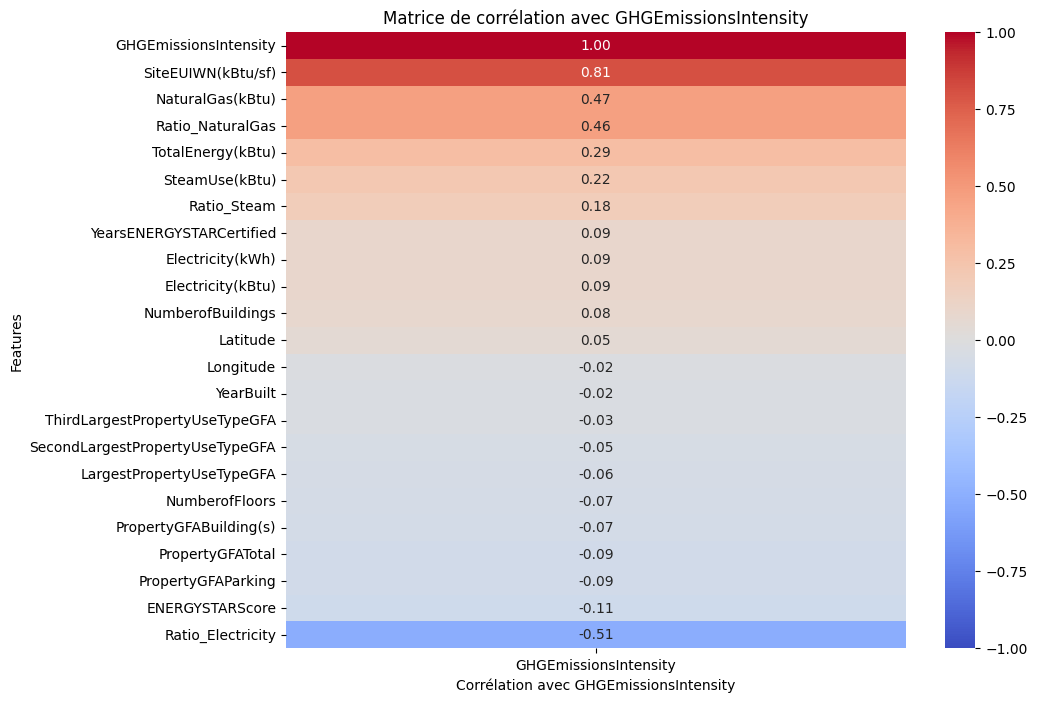

In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Liste des colonnes à inclure
colonnes_selectionnees = [
    # Caractéristiques structurelles et typologiques
    'BuildingType', 'PrimaryPropertyType', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
    'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',

    # Utilisation de la propriété
    'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 
    'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA', 
    'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',

    # Localisation
    'Latitude', 'Longitude',

    # Données contextuelles et qualitatives
    'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'Outlier', 'ComplianceStatus',

    # Colonnes spécifiques déjà présentes
    'SiteEUIWN(kBtu/sf)', 'Electricity(kWh)', 'GHGEmissionsIntensity',
    'Electricity(kBtu)', 'NaturalGas(kBtu)', 'SteamUse(kBtu)'
]

# Filtrer les colonnes disponibles dans le DataFrame
colonnes_disponibles = [col for col in colonnes_selectionnees if col in SeattleComsuption_Forecast_NR1.columns]

# Créer un DataFrame contenant uniquement les colonnes sélectionnées
SeattleComsuption_Forecast_NR1 = SeattleComsuption_Forecast_NR1[colonnes_disponibles]

# Calculer le total d'énergie
SeattleComsuption_Forecast_NR1['TotalEnergy(kBtu)'] = (
    SeattleComsuption_Forecast_NR1['Electricity(kBtu)'] +
    SeattleComsuption_Forecast_NR1['NaturalGas(kBtu)'] +
    SeattleComsuption_Forecast_NR1['SteamUse(kBtu)']
)

# Calculer les ratios
SeattleComsuption_Forecast_NR1['Ratio_Electricity'] = (
    SeattleComsuption_Forecast_NR1['Electricity(kBtu)'] / SeattleComsuption_Forecast_NR1['TotalEnergy(kBtu)']
)
SeattleComsuption_Forecast_NR1['Ratio_NaturalGas'] = (
    SeattleComsuption_Forecast_NR1['NaturalGas(kBtu)'] / SeattleComsuption_Forecast_NR1['TotalEnergy(kBtu)']
)
SeattleComsuption_Forecast_NR1['Ratio_Steam'] = (
    SeattleComsuption_Forecast_NR1['SteamUse(kBtu)'] / SeattleComsuption_Forecast_NR1['TotalEnergy(kBtu)']
)

# Gérer les cas où TotalEnergy est nul (éviter les divisions par zéro)
SeattleComsuption_Forecast_NR1['Ratio_Electricity'] = SeattleComsuption_Forecast_NR1['Ratio_Electricity'].fillna(0)
SeattleComsuption_Forecast_NR1['Ratio_NaturalGas'] = SeattleComsuption_Forecast_NR1['Ratio_NaturalGas'].fillna(0)
SeattleComsuption_Forecast_NR1['Ratio_Steam'] = SeattleComsuption_Forecast_NR1['Ratio_Steam'].fillna(0)

# Sélectionner uniquement les colonnes numériques pour la matrice de corrélation
numeric_cols = SeattleComsuption_Forecast_NR1.select_dtypes(include=['float', 'int'])

# Calculer la matrice de corrélation
correlation_matrix = numeric_cols.corr()

# Vérifier si 'SiteEUIWN(kBtu/sf)' est dans la matrice de corrélation
if 'GHGEmissionsIntensity' in correlation_matrix.columns:
    # Filtrer uniquement les corrélations avec 'SiteEUIWN(kBtu/sf)'
    correlation_with_siteeuiwn = correlation_matrix[['GHGEmissionsIntensity']].sort_values(by='GHGEmissionsIntensity', ascending=False)
    
    # Afficher la matrice de corrélation sous forme de heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_with_siteeuiwn, annot=True, cmap='coolwarm', cbar=True, fmt='.2f', vmin=-1, vmax=1)
    plt.title('Matrice de corrélation avec GHGEmissionsIntensity')
    plt.ylabel('Features')
    plt.xlabel('Corrélation avec GHGEmissionsIntensity')
    plt.show()
else:
    # Afficher un message si la colonne cible n'est pas trouvée
    print("La colonne 'GHGEmissionsIntensity' n'existe pas dans les données numériques.")


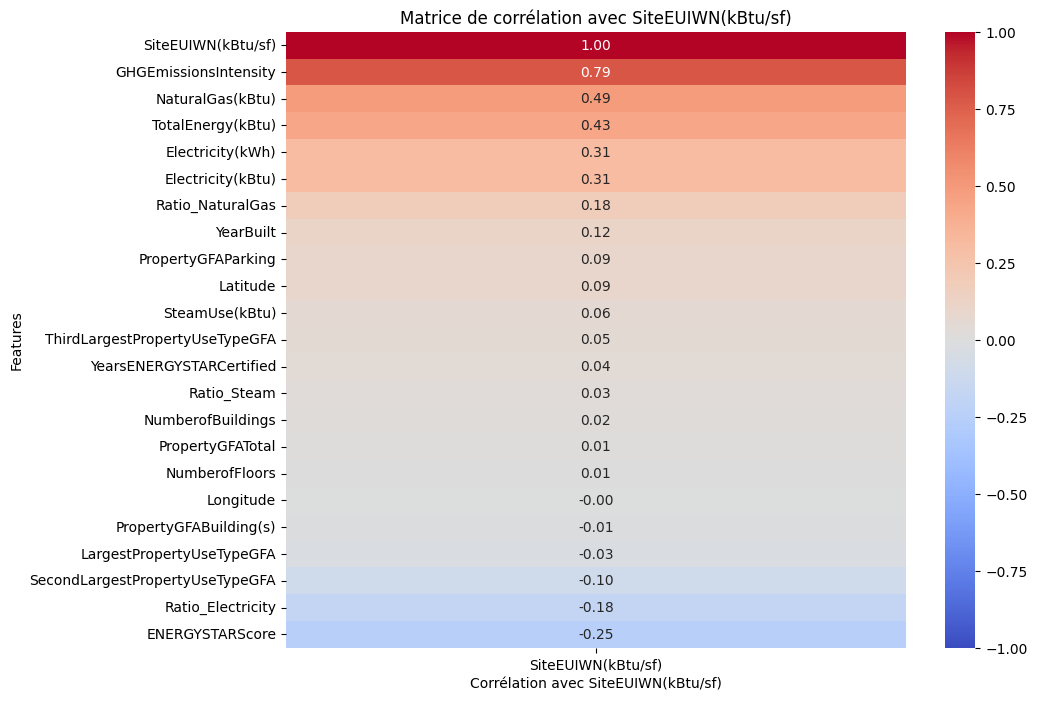

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Liste des colonnes à inclure
colonnes_selectionnees = [
    # Caractéristiques structurelles et typologiques
    'BuildingType', 'PrimaryPropertyType', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
    'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',

    # Utilisation de la propriété
    'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 
    'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA', 
    'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',

    # Localisation
    'Latitude', 'Longitude',

    # Données contextuelles et qualitatives
    'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'Outlier', 'ComplianceStatus',

    # Colonnes spécifiques pour les calculs de l'énergie
    'SiteEUIWN(kBtu/sf)', 'Electricity(kWh)', 'GHGEmissionsIntensity',
    'Electricity(kBtu)', 'NaturalGas(kBtu)', 'SteamUse(kBtu)'
]

# Filtrer les colonnes disponibles dans le DataFrame
colonnes_disponibles = [col for col in colonnes_selectionnees if col in SeattleComsuption_Forecast_NR1.columns]

# Créer un DataFrame contenant uniquement les colonnes sélectionnées
SeattleComsuption_Forecast_NR1 = SeattleComsuption_Forecast_NR1[colonnes_disponibles]

# Calculer le total d'énergie
SeattleComsuption_Forecast_NR1['TotalEnergy(kBtu)'] = (
    SeattleComsuption_Forecast_NR1['Electricity(kBtu)'] +
    SeattleComsuption_Forecast_NR1['NaturalGas(kBtu)'] +
    SeattleComsuption_Forecast_NR1['SteamUse(kBtu)']
)

# Calculer les ratios
SeattleComsuption_Forecast_NR1['Ratio_Electricity'] = (
    SeattleComsuption_Forecast_NR1['Electricity(kBtu)'] / SeattleComsuption_Forecast_NR1['TotalEnergy(kBtu)']
)
SeattleComsuption_Forecast_NR1['Ratio_NaturalGas'] = (
    SeattleComsuption_Forecast_NR1['NaturalGas(kBtu)'] / SeattleComsuption_Forecast_NR1['TotalEnergy(kBtu)']
)
SeattleComsuption_Forecast_NR1['Ratio_Steam'] = (
    SeattleComsuption_Forecast_NR1['SteamUse(kBtu)'] / SeattleComsuption_Forecast_NR1['TotalEnergy(kBtu)']
)

# Gérer les cas où TotalEnergy est nul (éviter les divisions par zéro)
SeattleComsuption_Forecast_NR1['Ratio_Electricity'] = SeattleComsuption_Forecast_NR1['Ratio_Electricity'].fillna(0)
SeattleComsuption_Forecast_NR1['Ratio_NaturalGas'] = SeattleComsuption_Forecast_NR1['Ratio_NaturalGas'].fillna(0)
SeattleComsuption_Forecast_NR1['Ratio_Steam'] = SeattleComsuption_Forecast_NR1['Ratio_Steam'].fillna(0)

# Sélectionner uniquement les colonnes numériques pour la matrice de corrélation
numeric_cols = SeattleComsuption_Forecast_NR1.select_dtypes(include=['float', 'int'])

# Calculer la matrice de corrélation
correlation_matrix = numeric_cols.corr()

# Vérifier si 'SiteEUIWN(kBtu/sf)' est dans la matrice de corrélation
if 'SiteEUIWN(kBtu/sf)' in correlation_matrix.columns:
    # Filtrer uniquement les corrélations avec 'SiteEUIWN(kBtu/sf)'
    correlation_with_siteeuiwn = correlation_matrix[['SiteEUIWN(kBtu/sf)']].sort_values(by='SiteEUIWN(kBtu/sf)', ascending=False)
    
    # Afficher la matrice de corrélation sous forme de heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_with_siteeuiwn, annot=True, cmap='coolwarm', cbar=True, fmt='.2f', vmin=-1, vmax=1)
    plt.title('Matrice de corrélation avec SiteEUIWN(kBtu/sf)')
    plt.ylabel('Features')
    plt.xlabel('Corrélation avec SiteEUIWN(kBtu/sf)')
    plt.show()
else:
    # Afficher un message si la colonne cible n'est pas trouvée
    print("La colonne 'SiteEUIWN(kBtu/sf)' n'existe pas dans les données numériques.")


In [181]:
missing_values = SeattleComsuption_Forecast_NR1.isnull().sum()
print(missing_values)

BuildingType                       0
PrimaryPropertyType                0
YearBuilt                          0
NumberofBuildings                  0
NumberofFloors                     0
PropertyGFATotal                   0
PropertyGFAParking                 0
PropertyGFABuilding(s)             0
LargestPropertyUseType             0
LargestPropertyUseTypeGFA          0
SecondLargestPropertyUseType       0
SecondLargestPropertyUseTypeGFA    0
ThirdLargestPropertyUseType        0
ThirdLargestPropertyUseTypeGFA     0
Latitude                           0
Longitude                          0
YearsENERGYSTARCertified           0
ENERGYSTARScore                    0
Outlier                            0
ComplianceStatus                   0
SiteEUIWN(kBtu/sf)                 0
Electricity(kWh)                   0
GHGEmissionsIntensity              0
Electricity(kBtu)                  0
NaturalGas(kBtu)                   0
SteamUse(kBtu)                     0
TotalEnergy(kBtu)                  0
R

In [182]:
SeattleComsuption_Forecast_NR1.describe()

,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,Latitude,Longitude,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUIWN(kBtu/sf),Electricity(kWh),GHGEmissionsIntensity,Electricity(kBtu),NaturalGas(kBtu),SteamUse(kBtu),TotalEnergy(kBtu),Ratio_Electricity,Ratio_NaturalGas,Ratio_Steam
count,1576.000000,1576.000000,1576.000000,1.576000e+03,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1.576000e+03,1576.000000,1576.000000,1.576000e+03,1576.000000,1.576000e+03,1.576000e+03,1.576000e+03,1.576000e+03,1576.000000,1576.000000,1576.000000
mean,1961.583756,1.061626,3.694797,9.458965e+04,11176.038071,83413.609137,78106.443502,80216.763396,10585.038268,47.615985,-122.332980,3.822893e+50,72.858356,70.705370,1.193946e+06,1.517363,4.073744e+06,1.491971e+06,1.772064e+05,5.742922e+06,0.697181,0.281002,0.018644
std,32.874508,0.762212,4.772554,1.253316e+05,35150.909465,107773.820649,100915.015687,68448.325934,7274.013169,0.048538,0.024351,1.003377e+50,25.293224,62.520212,1.964361e+06,2.029626,6.702399e+06,3.800193e+06,1.227164e+06,9.125578e+06,0.267468,0.266397,0.085808
min,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3636.000000,5656.000000,0.000000,0.000000,47.499170,-122.399770,2.007000e+03,1.000000,0.000000,-3.382680e+04,-0.020000,-1.154170e+05,0.000000e+00,0.000000e+00,-1.154170e+05,0.000000,0.000000,0.000000
25%,1930.000000,1.000000,1.000000,2.937000e+04,0.000000,28264.000000,25480.750000,10610.700000,10585.038268,47.584600,-122.343928,4.032400e+50,62.000000,34.799999,2.092435e+05,0.340000,7.139390e+05,0.000000e+00,0.000000e+00,1.223105e+06,0.488675,0.000000,0.000000
50%,1965.000000,1.000000,2.000000,4.812550e+04,0.000000,46261.500000,42894.500000,81511.400000,10585.038268,47.612840,-122.332890,4.032400e+50,84.000000,53.650000,4.591532e+05,0.850000,1.566631e+06,4.910975e+05,0.000000e+00,2.470604e+06,0.703201,0.247815,0.000000
75%,1989.000000,1.000000,4.000000,9.864250e+04,0.000000,89431.500000,85533.750000,136823.800000,10585.038268,47.649752,-122.321732,4.032400e+50,89.800000,83.500000,1.287878e+06,1.820000,4.394238e+06,1.409427e+06,0.000000e+00,6.348164e+06,1.000000,0.494346,0.000000
max,2015.000000,14.000000,49.000000,1.123435e+06,368980.000000,947987.000000,808980.000000,380639.000000,103478.000000,47.733870,-122.258640,2.016200e+51,100.000000,468.700012,2.011630e+07,16.990000,6.863682e+07,6.799054e+07,3.103019e+07,1.026737e+08,1.000000,1.000000,0.766988


In [183]:
SeattleComsuption_Forecast_NR1.columns

Index(['BuildingType', 'PrimaryPropertyType', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'Latitude', 'Longitude',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'Outlier',
       'ComplianceStatus', 'SiteEUIWN(kBtu/sf)', 'Electricity(kWh)',
       'GHGEmissionsIntensity', 'Electricity(kBtu)', 'NaturalGas(kBtu)',
       'SteamUse(kBtu)', 'TotalEnergy(kBtu)', 'Ratio_Electricity',
       'Ratio_NaturalGas', 'Ratio_Steam'],
      dtype='object')

In [184]:
# Exporter le DataFrame au format CSV
SeattleComsuption_Forecast_NR1.to_csv('SeattleComsuption_Forecast_NR1.csv', index=False)

# Message de confirmation
print("Le DataFrame a été exporté avec succès au format CSV.")



Le DataFrame a été exporté avec succès au format CSV.
